In [4]:
import pandas as pd
from google.colab import drive
from keras.models import Sequential
from keras.layers import Conv1D, Dense, Flatten, Reshape, Dropout, BatchNormalization, MaxPooling1D
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [5]:
drive.mount('/content/drive')

df = pd.read_excel('/content/drive/MyDrive/TCC/RMS INDEPENDENTES.xlsx', sheet_name='JEITO 7')

Mounted at /content/drive


In [6]:
def modelo(X):
  modelo = Sequential([
      Conv1D(filters=8, kernel_size=8, input_shape=(X.shape[1], 1), activation='relu', padding='same'),
      Flatten(),
      Dense(128, activation='relu'),
      Dense(units=1, activation='relu')
  ])

  return modelo

#Carro A-HB

##Treino

In [7]:
df_A_HB = pd.DataFrame(columns=df.columns)

for indice, linha in df.iterrows():
    if linha['VEICULO'] == 'A-HB':
         df_A_HB = pd.concat([df_A_HB, pd.DataFrame([linha], columns=df.columns)], ignore_index=True)

In [13]:
print(df_A_HB)

           RMS       IRI    V      k     c      ms   mus     kus VEICULO    P  \
0     0.374902  1.722854   30  14000  1876  186.75  41.5  200000    A-HB  1.0   
1     0.312542  1.530687   30  14000  1876  186.75  41.5  200000    A-HB  NaN   
2     0.299262  1.559335   30  14000  1876  186.75  41.5  200000    A-HB  NaN   
3     0.326102  1.575025   30  14000  1876  186.75  41.5  200000    A-HB  NaN   
4     0.425370  1.690348   30  14000  1876  186.75  41.5  200000    A-HB  NaN   
...        ...       ...  ...    ...   ...     ...   ...     ...     ...  ...   
5395  1.517264  2.776620  120  14000  1876  186.75  41.5  200000    A-HB  NaN   
5396  1.576646  2.713946  120  14000  1876  186.75  41.5  200000    A-HB  NaN   
5397  2.111287  1.971269  120  14000  1876  186.75  41.5  200000    A-HB  NaN   
5398  1.838563  3.323964  120  14000  1876  186.75  41.5  200000    A-HB  NaN   
5399  1.387600  1.667053  120  14000  1876  186.75  41.5  200000    A-HB  NaN   

      Unnamed: 10     RESUM

In [14]:
X1_A_HB = df_A_HB.iloc[:, 1:3]
X2_A_HB = df_A_HB.iloc[:, 3:8]
y_A_HB = df_A_HB.iloc[:, 0]

In [15]:
X2_A_HB['k'] = 0.869
X2_A_HB['c'] = 0.869
X2_A_HB['ms'] = 0.869
X2_A_HB['mus'] = 0.869
X2_A_HB['kus'] = 0.869

In [16]:
scaler = MinMaxScaler()
X1_A_HB = scaler.fit_transform(X1_A_HB)

In [17]:
print(X1_A_HB)
print(X2_A_HB)

[[0.17507015 0.        ]
 [0.14772091 0.        ]
 [0.1517981  0.        ]
 ...
 [0.21042462 1.        ]
 [0.4029404  1.        ]
 [0.16712854 1.        ]]
          k      c     ms    mus    kus
0     0.869  0.869  0.869  0.869  0.869
1     0.869  0.869  0.869  0.869  0.869
2     0.869  0.869  0.869  0.869  0.869
3     0.869  0.869  0.869  0.869  0.869
4     0.869  0.869  0.869  0.869  0.869
...     ...    ...    ...    ...    ...
5395  0.869  0.869  0.869  0.869  0.869
5396  0.869  0.869  0.869  0.869  0.869
5397  0.869  0.869  0.869  0.869  0.869
5398  0.869  0.869  0.869  0.869  0.869
5399  0.869  0.869  0.869  0.869  0.869

[5400 rows x 5 columns]


In [18]:
X2_A_HB = X2_A_HB.astype('float64').to_numpy()

In [19]:
X_A_HB = np.concatenate((X1_A_HB, X2_A_HB), axis=1)

In [20]:
print(X_A_HB)

[[0.17507015 0.         0.869      ... 0.869      0.869      0.869     ]
 [0.14772091 0.         0.869      ... 0.869      0.869      0.869     ]
 [0.1517981  0.         0.869      ... 0.869      0.869      0.869     ]
 ...
 [0.21042462 1.         0.869      ... 0.869      0.869      0.869     ]
 [0.4029404  1.         0.869      ... 0.869      0.869      0.869     ]
 [0.16712854 1.         0.869      ... 0.869      0.869      0.869     ]]


In [21]:
modelo_A_HB = modelo(X_A_HB)

modelo_A_HB.compile(optimizer='adam', loss='mean_squared_error')

modelo_A_HB.fit(X_A_HB, y_A_HB, epochs=30, batch_size=32, verbose=1)

y_pred_A_HB = modelo_A_HB.predict(X_A_HB)

mse = mean_squared_error(y_A_HB, y_pred_A_HB)
r2 = r2_score(y_A_HB, y_pred_A_HB)

print(f'Mean Squared Error (MSE): {mse:.3f}')
print(f'R^2 Score: {r2:.3f}')

Epoch 1/30
169/169 [==============================] - 3s 8ms/step - loss: 0.0967
Epoch 2/30
169/169 [==============================] - 1s 6ms/step - loss: 0.0198
Epoch 3/30
169/169 [==============================] - 2s 9ms/step - loss: 0.0186
Epoch 4/30
169/169 [==============================] - 1s 5ms/step - loss: 0.0185
Epoch 5/30
169/169 [==============================] - 1s 4ms/step - loss: 0.0179
Epoch 6/30
169/169 [==============================] - 1s 4ms/step - loss: 0.0186
Epoch 7/30
169/169 [==============================] - 1s 4ms/step - loss: 0.0183
Epoch 8/30
169/169 [==============================] - 1s 4ms/step - loss: 0.0180
Epoch 9/30
169/169 [==============================] - 1s 3ms/step - loss: 0.0181
Epoch 10/30
169/169 [==============================] - 0s 2ms/step - loss: 0.0181
Epoch 11/30
169/169 [==============================] - 0s 2ms/step - loss: 0.0180
Epoch 12/30
169/169 [==============================] - 0s 2ms/step - loss: 0.0182
Epoch 13/30
169/169 [====

##Graficos

###Geral

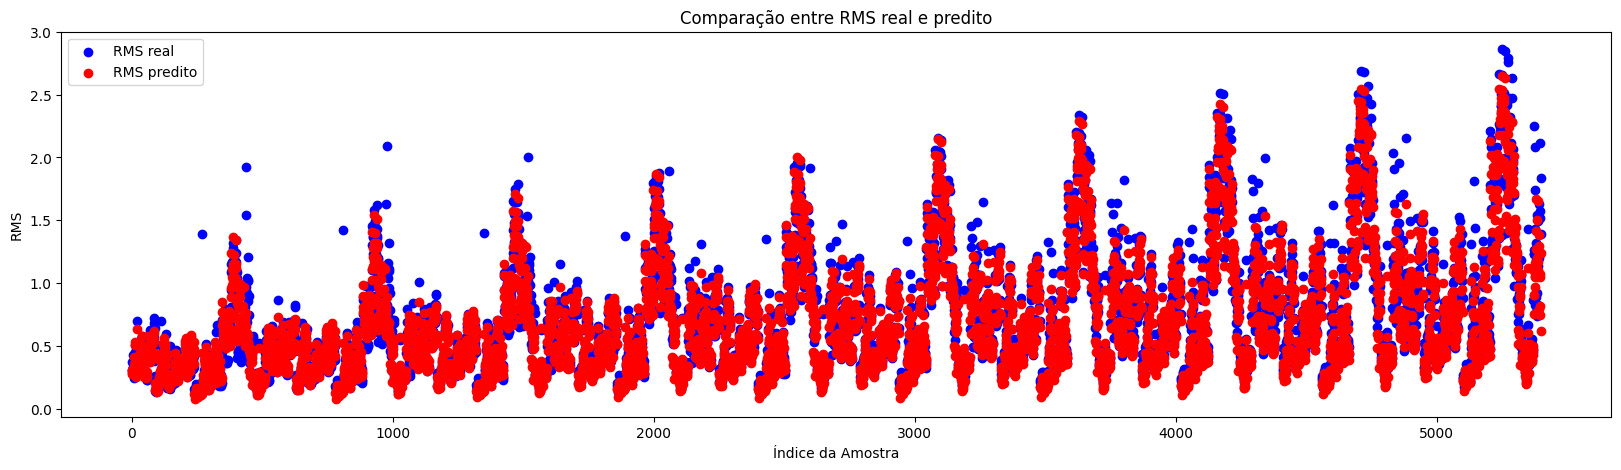

In [15]:
plt.figure(figsize=(20, 5))

plt.scatter(range(len(y_A_HB)), y_A_HB, label='RMS real', color='blue')
plt.scatter(range(len(y_pred_A_HB)), y_pred_A_HB, label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito')
plt.show()

In [16]:
plt.figure(figsize=(20, 5))

plt.plot(range(len(y_A_HB)), y_A_HB, label='RMS real', color='blue')
plt.plot(range(len(y_pred_A_HB)), y_pred_A_HB, label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito')
plt.show()

#### K -5%

In [17]:
X1_A_HB_k_menos_5 = df_A_HB.iloc[:, 1:3]
X2_A_HB_k_menos_5= df_A_HB.iloc[:, 3:8]

In [18]:
X2_A_HB_k_menos_5['k'] = 0.826
X2_A_HB_k_menos_5['c'] = 0.869
X2_A_HB_k_menos_5['ms'] = 0.869
X2_A_HB_k_menos_5['mus'] = 0.869
X2_A_HB_k_menos_5['kus'] = 0.869

In [19]:
print(X2_A_HB_k_menos_5)

          k      c     ms    mus    kus
0     0.826  0.869  0.869  0.869  0.869
1     0.826  0.869  0.869  0.869  0.869
2     0.826  0.869  0.869  0.869  0.869
3     0.826  0.869  0.869  0.869  0.869
4     0.826  0.869  0.869  0.869  0.869
...     ...    ...    ...    ...    ...
5395  0.826  0.869  0.869  0.869  0.869
5396  0.826  0.869  0.869  0.869  0.869
5397  0.826  0.869  0.869  0.869  0.869
5398  0.826  0.869  0.869  0.869  0.869
5399  0.826  0.869  0.869  0.869  0.869

[5400 rows x 5 columns]


In [20]:
scaler = MinMaxScaler()
X1_A_HB_k_menos_5 = scaler.fit_transform(X1_A_HB_k_menos_5)

In [21]:
X2_A_HB_k_menos_5 = X2_A_HB_k_menos_5.astype('float64').to_numpy()

In [22]:
X_A_HB_k_menos_5 = np.concatenate((X1_A_HB_k_menos_5, X2_A_HB_k_menos_5), axis=1)

In [23]:
print(X_A_HB_k_menos_5)

[[0.17507015 0.         0.826      ... 0.869      0.869      0.869     ]
 [0.14772091 0.         0.826      ... 0.869      0.869      0.869     ]
 [0.1517981  0.         0.826      ... 0.869      0.869      0.869     ]
 ...
 [0.21042462 1.         0.826      ... 0.869      0.869      0.869     ]
 [0.4029404  1.         0.826      ... 0.869      0.869      0.869     ]
 [0.16712854 1.         0.826      ... 0.869      0.869      0.869     ]]


In [24]:
y_pred_A_HB_k_menos_5 = modelo_A_HB.predict(X_A_HB_k_menos_5)

mse_A_HB_k_menos_5 = mean_squared_error(y_A_HB, y_pred_A_HB_k_menos_5)
r2_A_HB_k_menos_5 = r2_score(y_A_HB, y_pred_A_HB_k_menos_5)

print(f'Mean Squared Error (MSE): {mse_A_HB_k_menos_5:.3f}')
print(f'R^2 Score: {r2_A_HB_k_menos_5:.3f}')

169/169 [==============================] - 0s 2ms/step
Mean Squared Error (MSE): 0.017
R^2 Score: 0.921


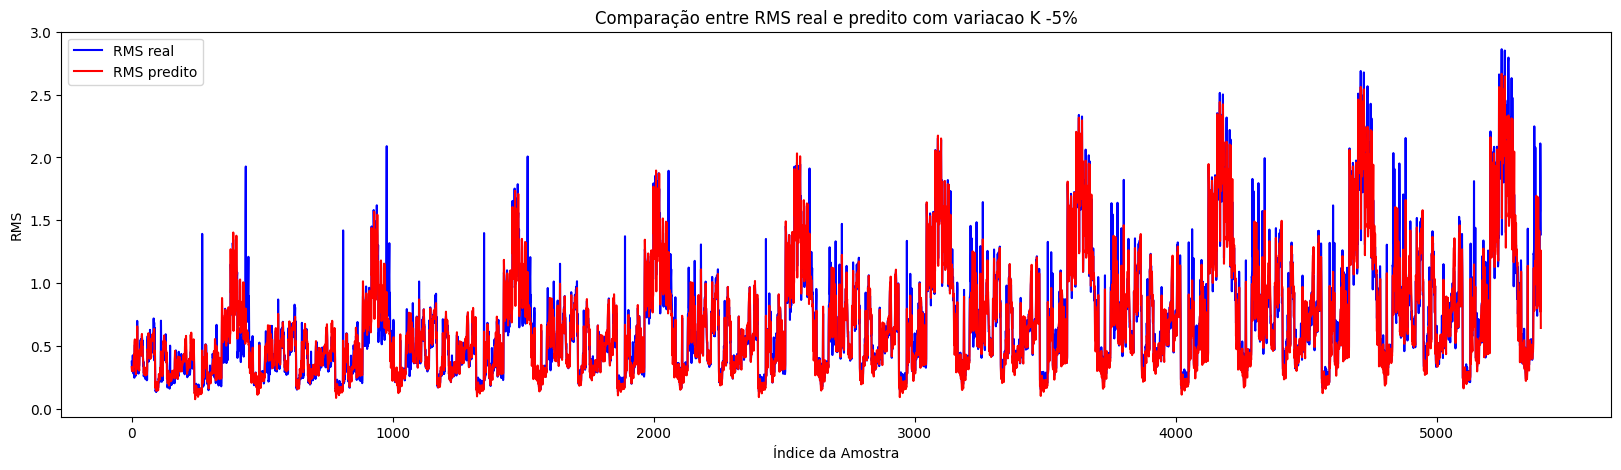

In [25]:
plt.figure(figsize=(20, 5))

plt.plot(range(len(y_A_HB)), y_A_HB, label='RMS real', color='blue')
plt.plot(range(len(y_pred_A_HB_k_menos_5)), y_pred_A_HB_k_menos_5, label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -5%')
plt.show()

##### K -5% 30 km/h

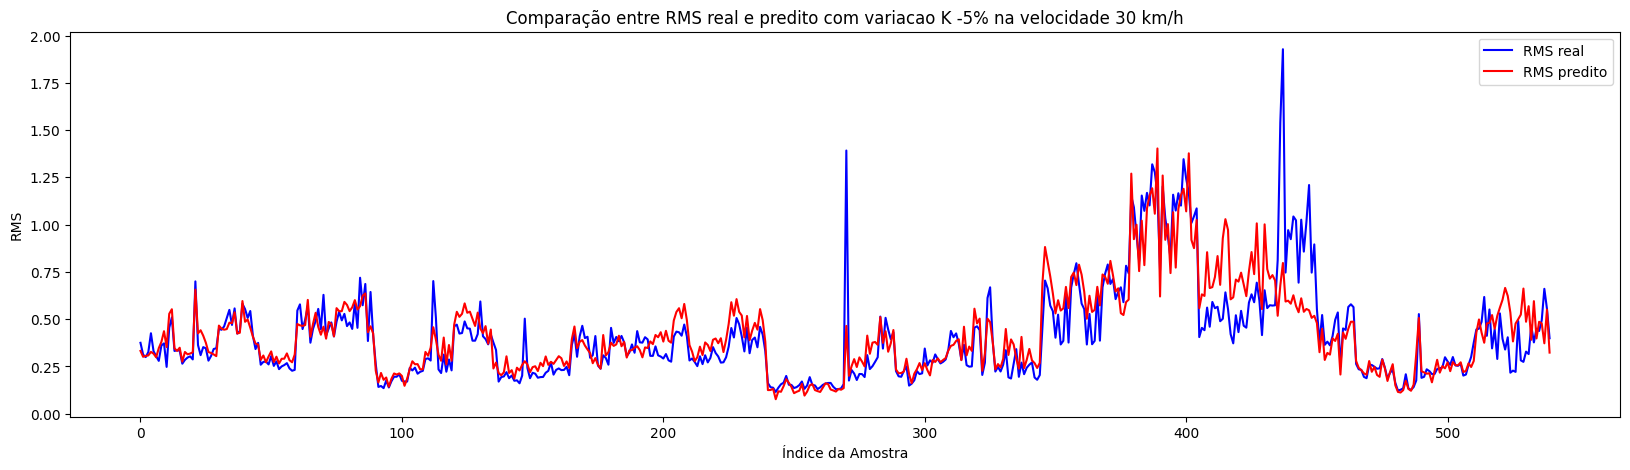

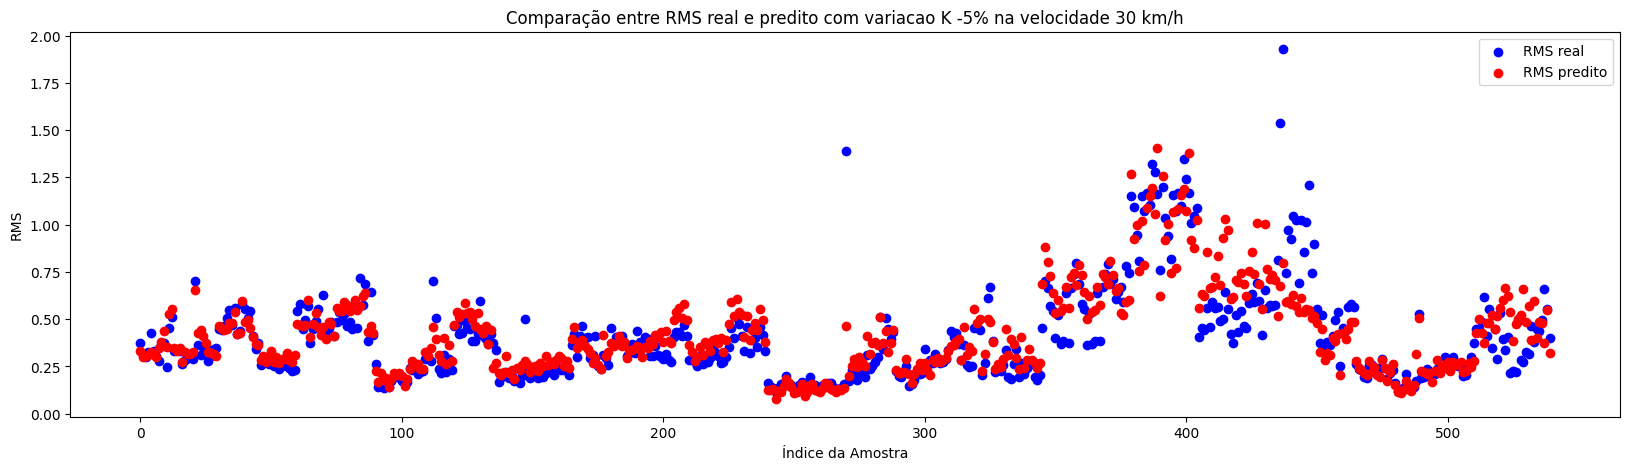

In [26]:
plt.figure(figsize=(20, 5))

plt.plot(range(540), y_A_HB[:540], label='RMS real', color='blue')
plt.plot(range(540), y_pred_A_HB_k_menos_5[:540], label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -5% na velocidade 30 km/h')
plt.show()

plt.figure(figsize=(20, 5))

plt.scatter(range(540), y_A_HB[:540], label='RMS real', color='blue')
plt.scatter(range(540), y_pred_A_HB_k_menos_5[:540], label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -5% na velocidade 30 km/h')
plt.show()

##### K -5% 40 km/h

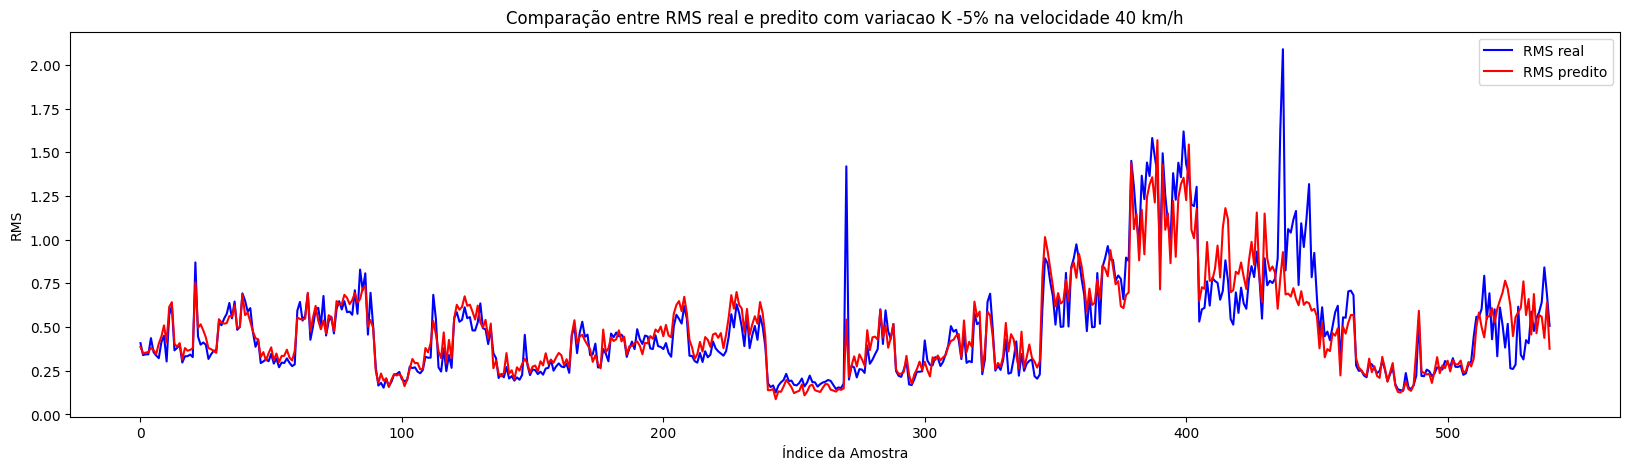

In [27]:
plt.figure(figsize=(20, 5))

plt.plot(range(540), y_A_HB[540:1080], label='RMS real', color='blue')
plt.plot(range(540), y_pred_A_HB_k_menos_5[540:1080], label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -5% na velocidade 40 km/h')
plt.show()

##### K -5% 50 km/h

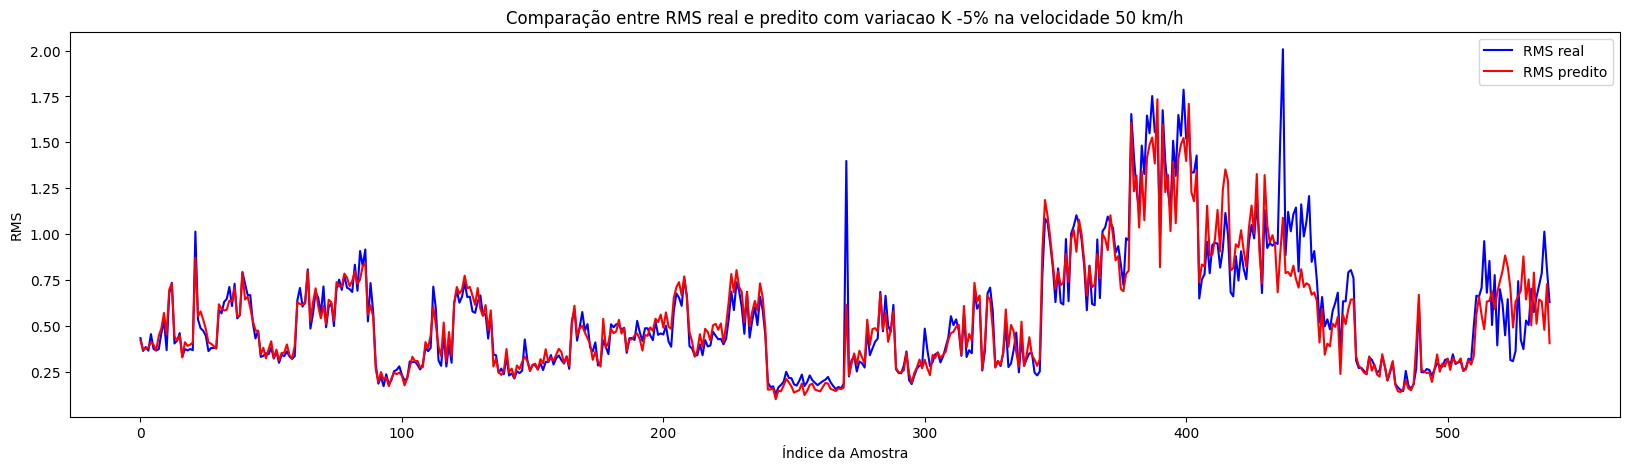

In [28]:
plt.figure(figsize=(20, 5))

plt.plot(range(540), y_A_HB[1080:1620], label='RMS real', color='blue')
plt.plot(range(540), y_pred_A_HB_k_menos_5[1080:1620], label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -5% na velocidade 50 km/h')
plt.show()

##### K -5% 60 km/h

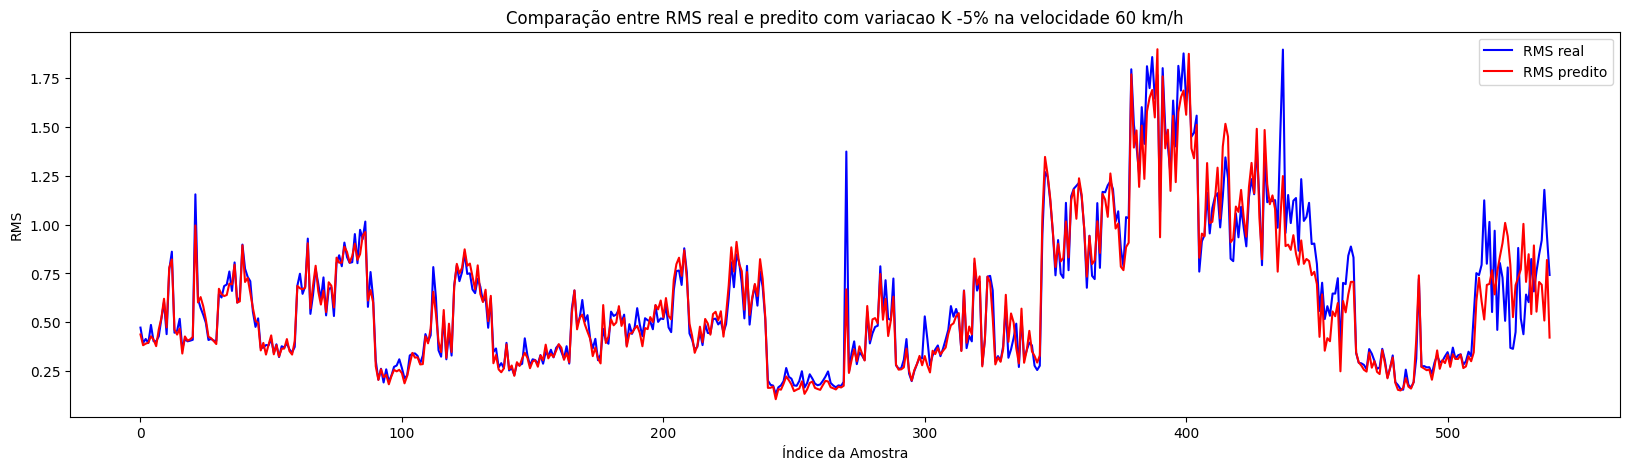

In [29]:
plt.figure(figsize=(20, 5))

plt.plot(range(540), y_A_HB[1620:2160], label='RMS real', color='blue')
plt.plot(range(540), y_pred_A_HB_k_menos_5[1620:2160], label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -5% na velocidade 60 km/h')
plt.show()

##### K -5% 70 km/h

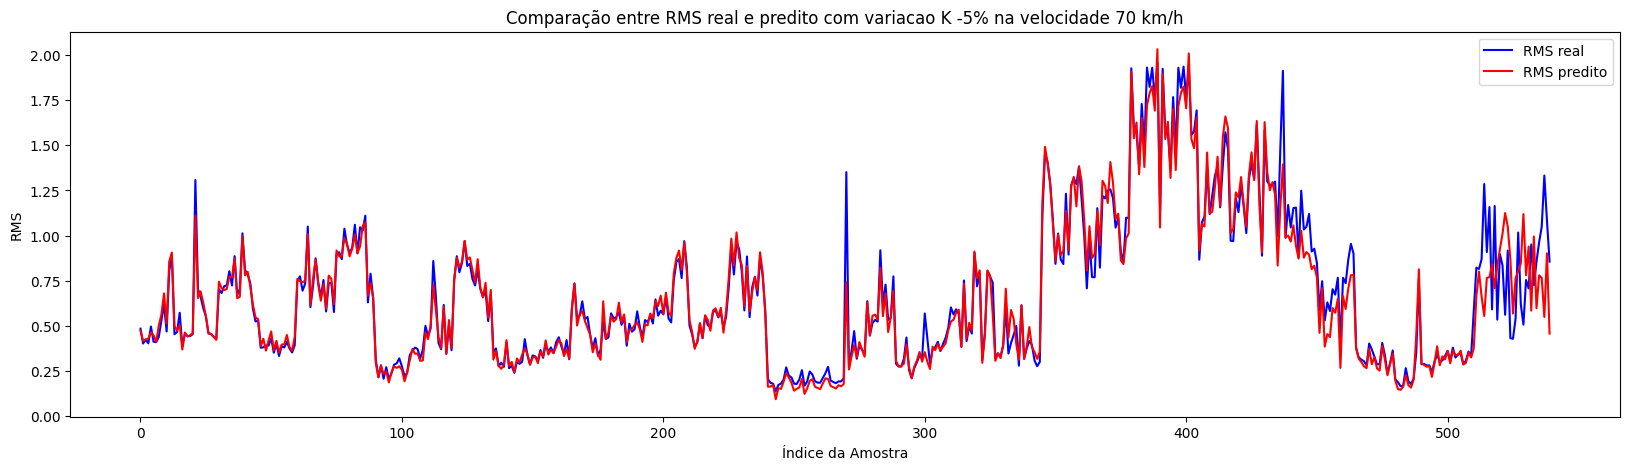

In [30]:
plt.figure(figsize=(20, 5))

plt.plot(range(540), y_A_HB[2160:2700], label='RMS real', color='blue')
plt.plot(range(540), y_pred_A_HB_k_menos_5[2160:2700], label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -5% na velocidade 70 km/h')
plt.show()

##### K -5% 80 km/h

In [31]:
plt.figure(figsize=(20, 5))

plt.plot(range(540), y_A_HB[2700:3240], label='RMS real', color='blue')
plt.plot(range(540), y_pred_A_HB_k_menos_5[2700:3240], label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -5% na velocidade 80 km/h')
plt.show()

##### K -5% 90 km/h

In [32]:
plt.figure(figsize=(20, 5))

plt.plot(range(540), y_A_HB[3240:3780], label='RMS real', color='blue')
plt.plot(range(540), y_pred_A_HB_k_menos_5[3240:3780], label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -5% na velocidade 90 km/h')
plt.show()

##### K -5% 100 km/h

In [33]:
plt.figure(figsize=(20, 5))

plt.plot(range(540), y_A_HB[3780:4320], label='RMS real', color='blue')
plt.plot(range(540), y_pred_A_HB_k_menos_5[3780:4320], label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -5% na velocidade 100 km/h')
plt.show()

##### K -5% 110 km/h

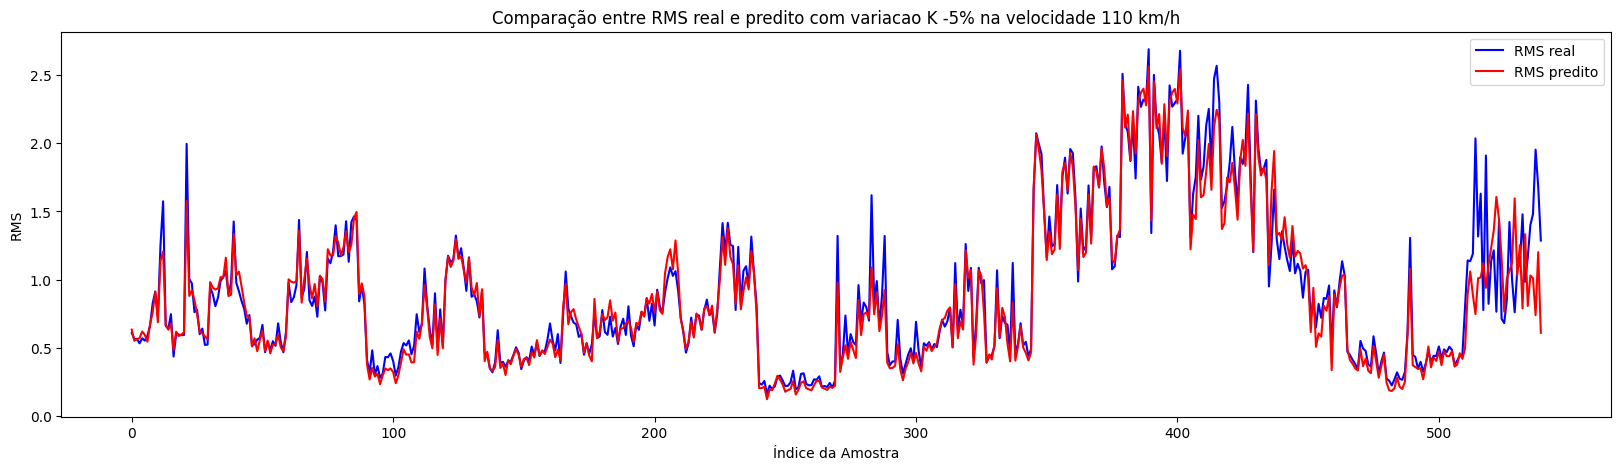

In [34]:
plt.figure(figsize=(20, 5))

plt.plot(range(540), y_A_HB[4320:4860], label='RMS real', color='blue')
plt.plot(range(540), y_pred_A_HB_k_menos_5[4320:4860], label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -5% na velocidade 110 km/h')
plt.show()

##### K -5% 120 km/h

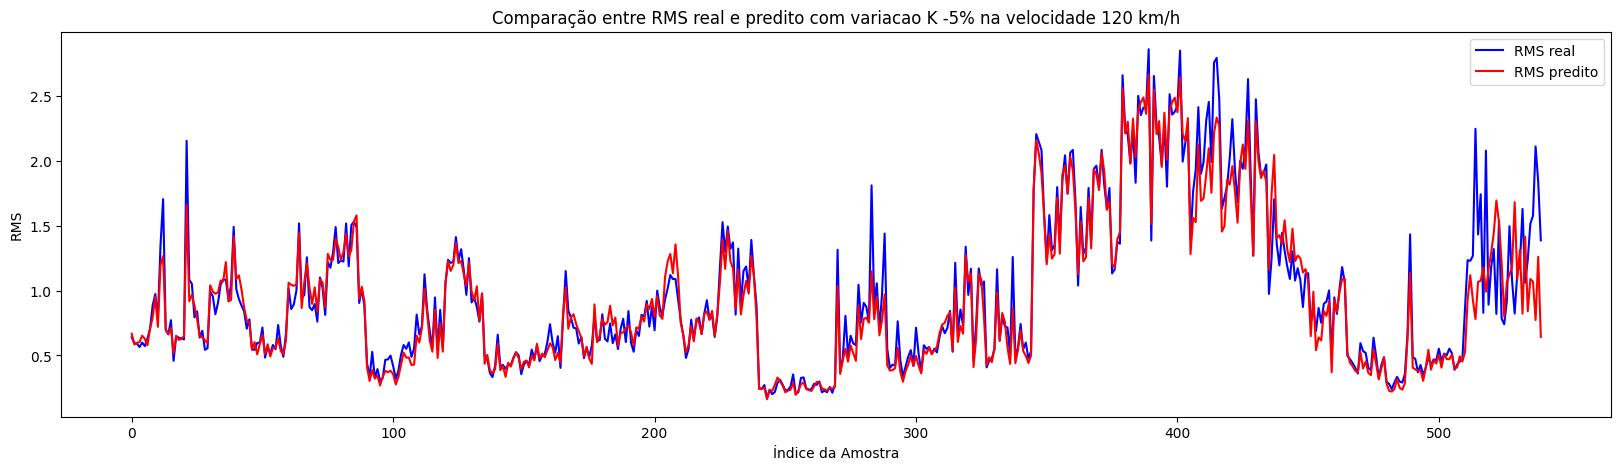

In [35]:
plt.figure(figsize=(20, 5))

plt.plot(range(540), y_A_HB[4860:5400], label='RMS real', color='blue')
plt.plot(range(540), y_pred_A_HB_k_menos_5[4860:5400], label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -5% na velocidade 120 km/h')
plt.show()

#### K -10%

In [36]:
X1_A_HB_k_menos_10 = df_A_HB.iloc[:, 1:3]
X2_A_HB_k_menos_10= df_A_HB.iloc[:, 3:8]

In [37]:
X2_A_HB_k_menos_10['k'] = 0.782
X2_A_HB_k_menos_10['c'] = 0.869
X2_A_HB_k_menos_10['ms'] = 0.869
X2_A_HB_k_menos_10['mus'] = 0.869
X2_A_HB_k_menos_10['kus'] = 0.869

In [38]:
print(X2_A_HB_k_menos_10)

          k      c     ms    mus    kus
0     0.782  0.869  0.869  0.869  0.869
1     0.782  0.869  0.869  0.869  0.869
2     0.782  0.869  0.869  0.869  0.869
3     0.782  0.869  0.869  0.869  0.869
4     0.782  0.869  0.869  0.869  0.869
...     ...    ...    ...    ...    ...
5395  0.782  0.869  0.869  0.869  0.869
5396  0.782  0.869  0.869  0.869  0.869
5397  0.782  0.869  0.869  0.869  0.869
5398  0.782  0.869  0.869  0.869  0.869
5399  0.782  0.869  0.869  0.869  0.869

[5400 rows x 5 columns]


In [39]:
scaler = MinMaxScaler()
X1_A_HB_k_menos_10 = scaler.fit_transform(X1_A_HB_k_menos_10)

In [40]:
X2_A_HB_k_menos_10 = X2_A_HB_k_menos_10.astype('float64').to_numpy()

In [41]:
X_A_HB_k_menos_10 = np.concatenate((X1_A_HB_k_menos_10, X2_A_HB_k_menos_10), axis=1)

In [42]:
print(X_A_HB_k_menos_10)

[[0.17507015 0.         0.782      ... 0.869      0.869      0.869     ]
 [0.14772091 0.         0.782      ... 0.869      0.869      0.869     ]
 [0.1517981  0.         0.782      ... 0.869      0.869      0.869     ]
 ...
 [0.21042462 1.         0.782      ... 0.869      0.869      0.869     ]
 [0.4029404  1.         0.782      ... 0.869      0.869      0.869     ]
 [0.16712854 1.         0.782      ... 0.869      0.869      0.869     ]]


In [44]:
y_pred_A_HB_k_menos_10 = modelo_A_HB.predict(X_A_HB_k_menos_10)

mse_A_HB_k_menos_10 = mean_squared_error(y_A_HB, y_pred_A_HB_k_menos_10)
r2_A_HB_k_menos_10 = r2_score(y_A_HB, y_pred_A_HB_k_menos_10)

print(f'Mean Squared Error (MSE): {mse_A_HB_k_menos_10:.3f}')
print(f'R^2 Score: {r2_A_HB_k_menos_10:.3f}')

169/169 [==============================] - 1s 5ms/step
Mean Squared Error (MSE): 0.017
R^2 Score: 0.921


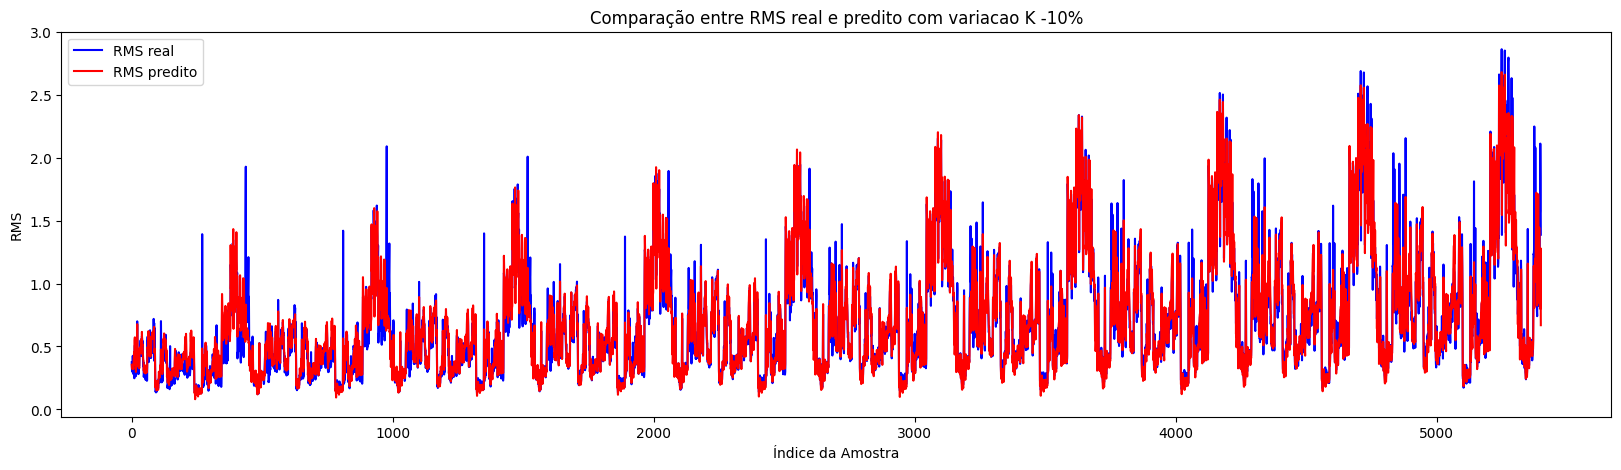

In [45]:
plt.figure(figsize=(20, 5))

plt.plot(range(len(y_A_HB)), y_A_HB, label='RMS real', color='blue')
plt.plot(range(len(y_pred_A_HB_k_menos_10)), y_pred_A_HB_k_menos_10, label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -10%')
plt.show()

##### K -10% 30 km/h

In [46]:
plt.figure(figsize=(20, 5))

plt.plot(range(540), y_A_HB[:540], label='RMS real', color='blue')
plt.plot(range(540), y_pred_A_HB_k_menos_10[:540], label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -10% na velocidade 30 km/h')
plt.show()

#####K -10% 40 km/h

In [47]:
plt.figure(figsize=(20, 5))

plt.plot(range(540), y_A_HB[540:1080], label='RMS real', color='blue')
plt.plot(range(540), y_pred_A_HB_k_menos_10[540:1080], label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -10% na velocidade 40 km/h')
plt.show()

#####K -10% 50 km/h

In [48]:
plt.figure(figsize=(20, 5))

plt.plot(range(540), y_A_HB[1080:1620], label='RMS real', color='blue')
plt.plot(range(540), y_pred_A_HB_k_menos_10[1080:1620], label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -10% na velocidade 50 km/h')
plt.show()

#####K -10% 60 km/h

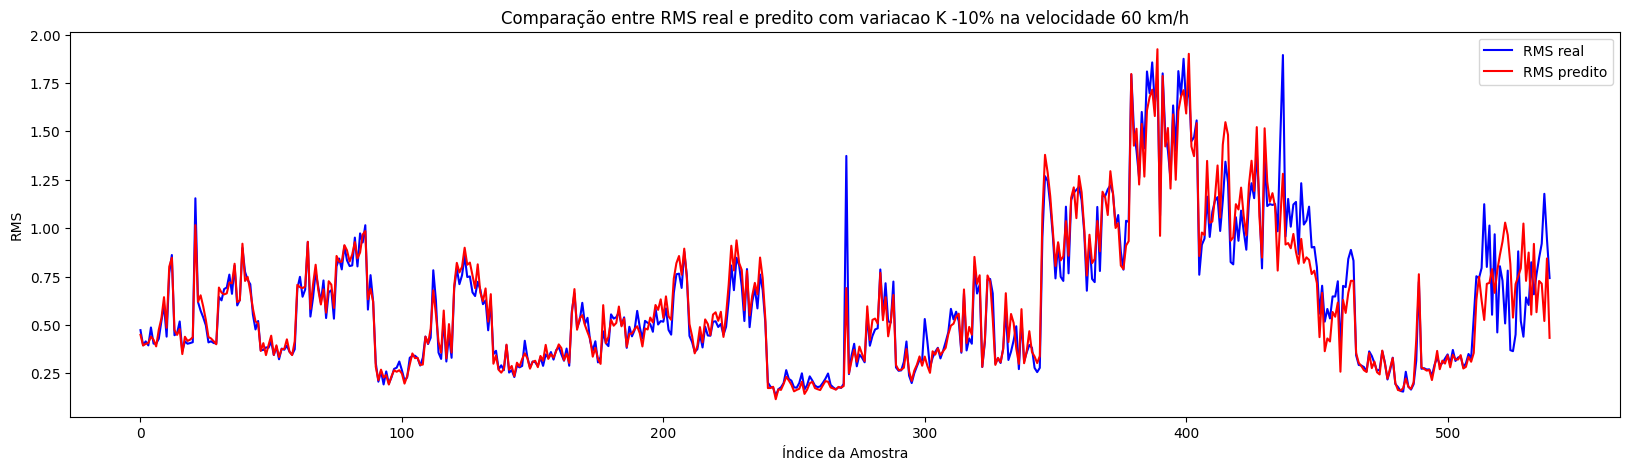

In [49]:
plt.figure(figsize=(20, 5))

plt.plot(range(540), y_A_HB[1620:2160], label='RMS real', color='blue')
plt.plot(range(540), y_pred_A_HB_k_menos_10[1620:2160], label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -10% na velocidade 60 km/h')
plt.show()

#####K -10% 70 km/h

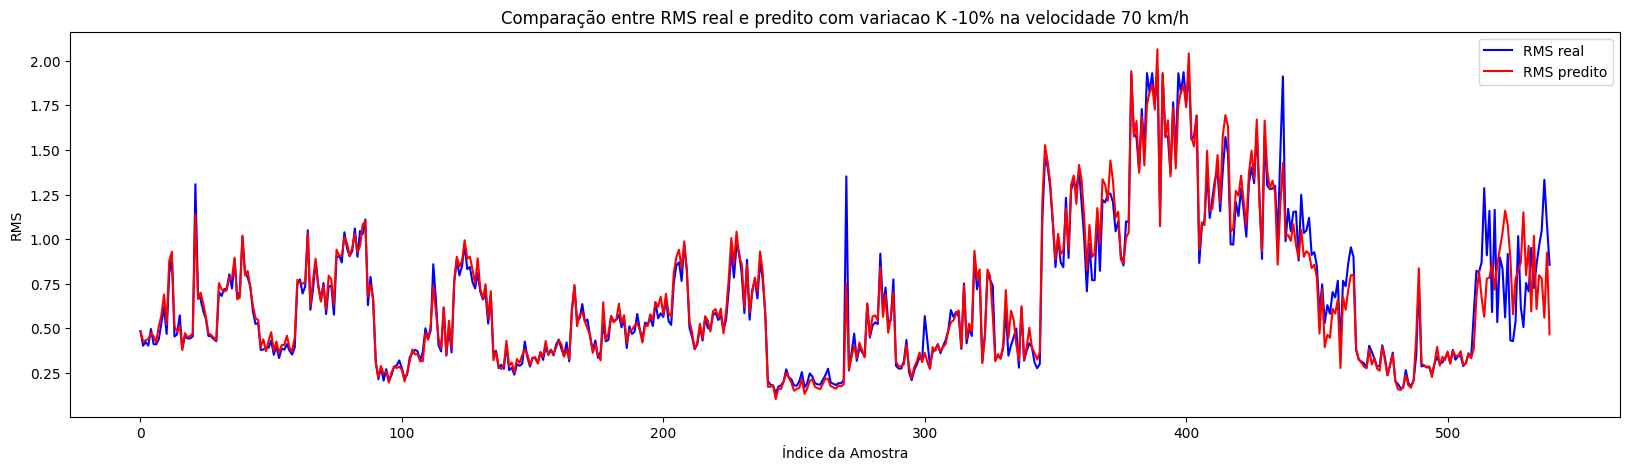

In [50]:
plt.figure(figsize=(20, 5))

plt.plot(range(540), y_A_HB[2160:2700], label='RMS real', color='blue')
plt.plot(range(540), y_pred_A_HB_k_menos_10[2160:2700], label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -10% na velocidade 70 km/h')
plt.show()

#####K -10% 80 km/h

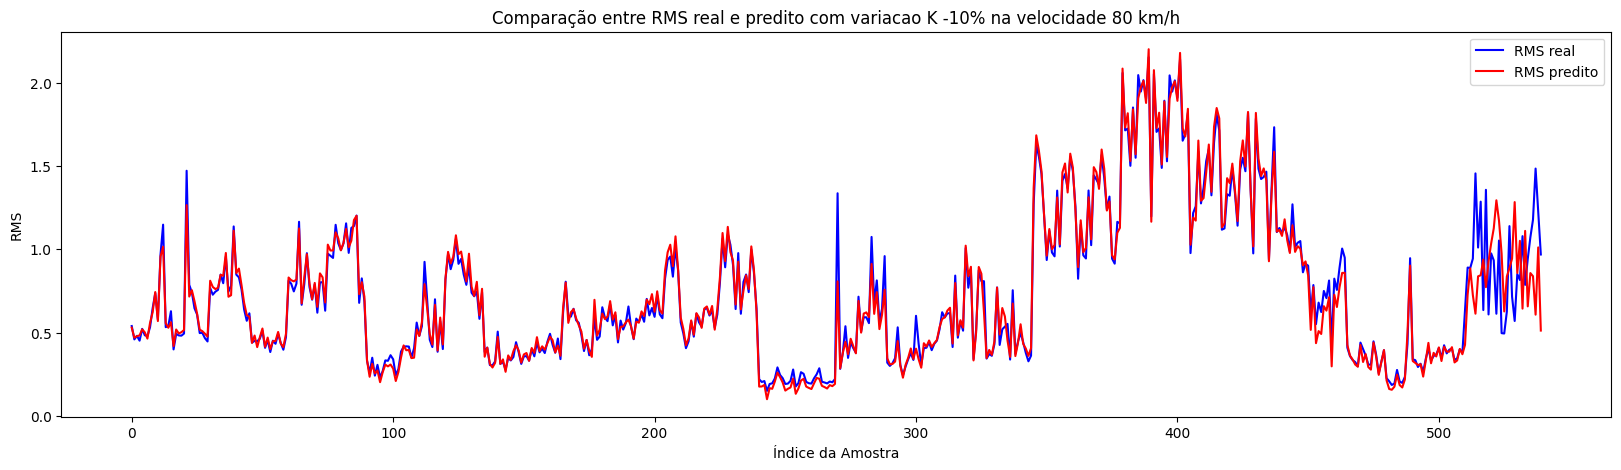

In [51]:
plt.figure(figsize=(20, 5))

plt.plot(range(540), y_A_HB[2700:3240], label='RMS real', color='blue')
plt.plot(range(540), y_pred_A_HB_k_menos_10[2700:3240], label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -10% na velocidade 80 km/h')
plt.show()

#####K -10% 90 km/h

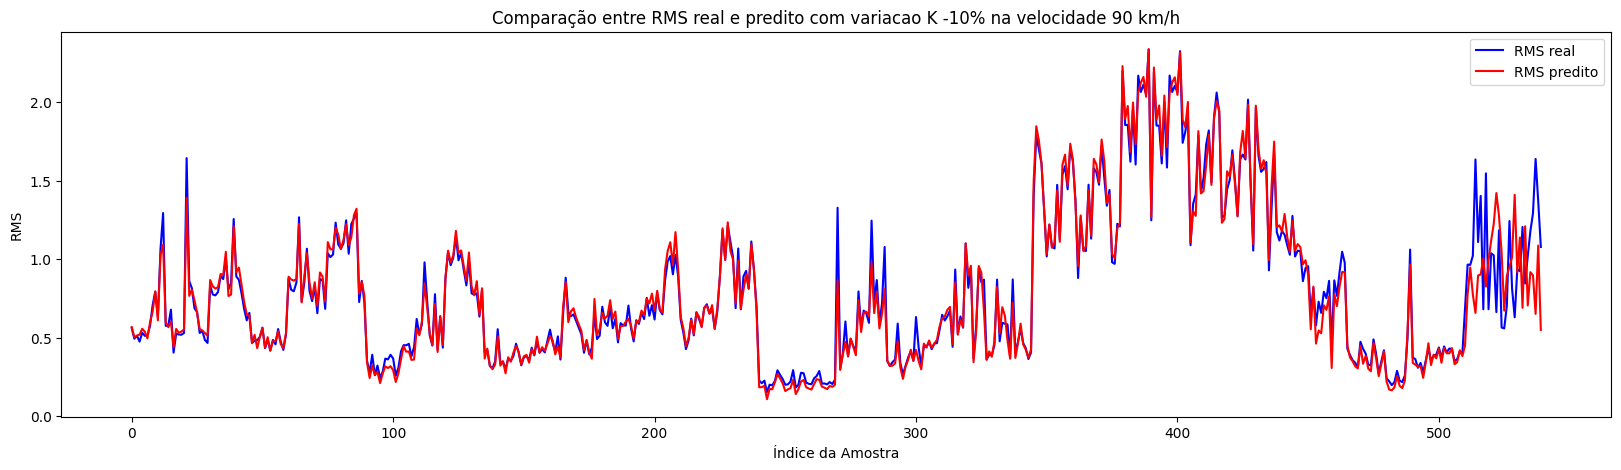

In [52]:
plt.figure(figsize=(20, 5))

plt.plot(range(540), y_A_HB[3240:3780], label='RMS real', color='blue')
plt.plot(range(540), y_pred_A_HB_k_menos_10[3240:3780], label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -10% na velocidade 90 km/h')
plt.show()

#####K -10% 100 km/h

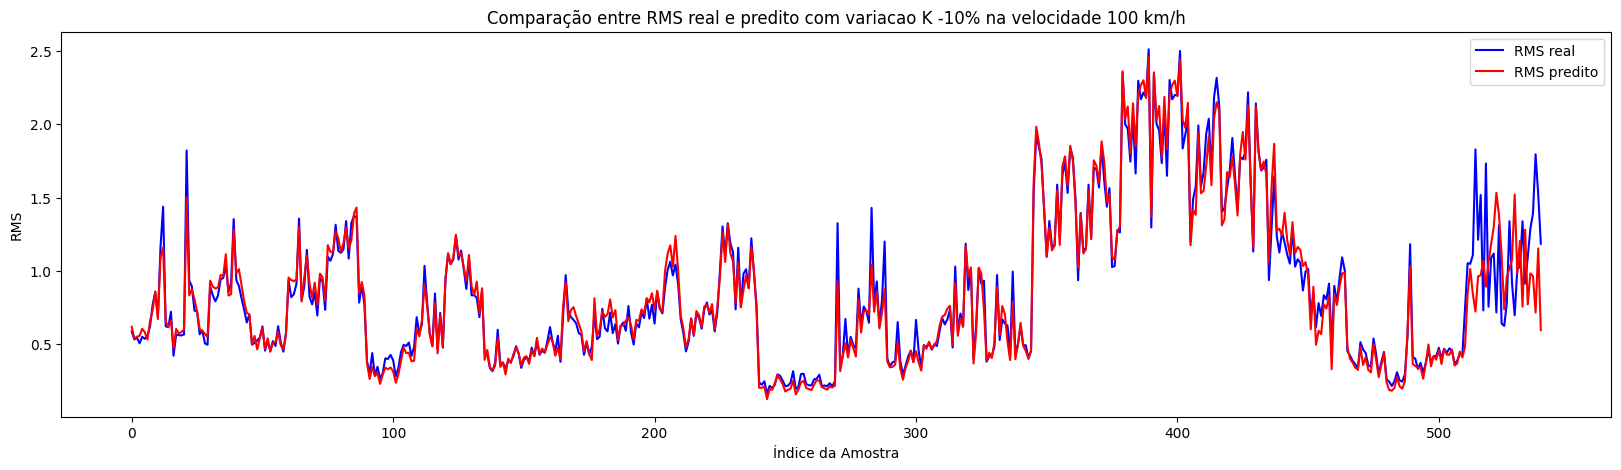

In [53]:
plt.figure(figsize=(20, 5))

plt.plot(range(540), y_A_HB[3780:4320], label='RMS real', color='blue')
plt.plot(range(540), y_pred_A_HB_k_menos_10[3780:4320], label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -10% na velocidade 100 km/h')
plt.show()

#####K -10% 110 km/h

In [54]:
plt.figure(figsize=(20, 5))

plt.plot(range(540), y_A_HB[4320:4860], label='RMS real', color='blue')
plt.plot(range(540), y_pred_A_HB_k_menos_10[4320:4860], label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -10% na velocidade 110 km/h')
plt.show()

#####K -10% 120 km/h

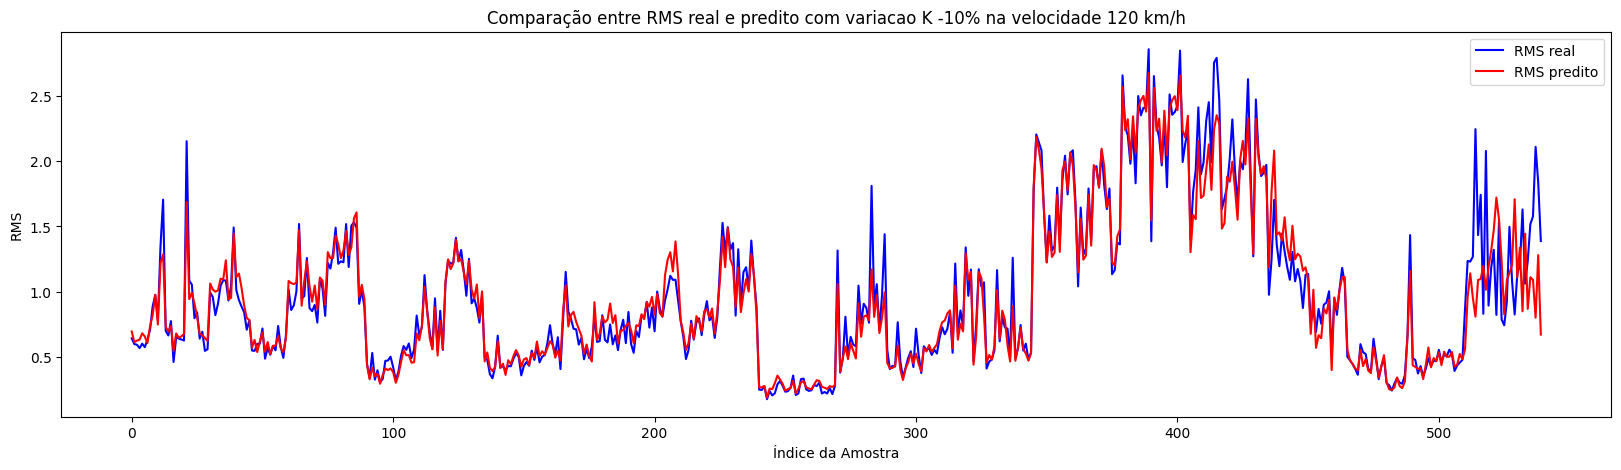

In [55]:
plt.figure(figsize=(20, 5))

plt.plot(range(540), y_A_HB[4860:5400], label='RMS real', color='blue')
plt.plot(range(540), y_pred_A_HB_k_menos_10[4860:5400], label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -10% na velocidade 120 km/h')
plt.show()

#### K -15%

In [56]:
X1_A_HB_k_menos_15 = df_A_HB.iloc[:, 1:3]
X2_A_HB_k_menos_15= df_A_HB.iloc[:, 3:8]

In [57]:
X2_A_HB_k_menos_15['k'] = 0.739
X2_A_HB_k_menos_15['c'] = 0.869
X2_A_HB_k_menos_15['ms'] = 0.869
X2_A_HB_k_menos_15['mus'] = 0.869
X2_A_HB_k_menos_15['kus'] = 0.869

In [58]:
print(X2_A_HB_k_menos_15)

          k      c     ms    mus    kus
0     0.739  0.869  0.869  0.869  0.869
1     0.739  0.869  0.869  0.869  0.869
2     0.739  0.869  0.869  0.869  0.869
3     0.739  0.869  0.869  0.869  0.869
4     0.739  0.869  0.869  0.869  0.869
...     ...    ...    ...    ...    ...
5395  0.739  0.869  0.869  0.869  0.869
5396  0.739  0.869  0.869  0.869  0.869
5397  0.739  0.869  0.869  0.869  0.869
5398  0.739  0.869  0.869  0.869  0.869
5399  0.739  0.869  0.869  0.869  0.869

[5400 rows x 5 columns]


In [59]:
scaler = MinMaxScaler()
X1_A_HB_k_menos_15 = scaler.fit_transform(X1_A_HB_k_menos_15)

In [60]:
X2_A_HB_k_menos_15 = X2_A_HB_k_menos_15.astype('float64').to_numpy()

In [61]:
X_A_HB_k_menos_15 = np.concatenate((X1_A_HB_k_menos_15, X2_A_HB_k_menos_15), axis=1)

In [62]:
print(X_A_HB_k_menos_15)

[[0.17507015 0.         0.739      ... 0.869      0.869      0.869     ]
 [0.14772091 0.         0.739      ... 0.869      0.869      0.869     ]
 [0.1517981  0.         0.739      ... 0.869      0.869      0.869     ]
 ...
 [0.21042462 1.         0.739      ... 0.869      0.869      0.869     ]
 [0.4029404  1.         0.739      ... 0.869      0.869      0.869     ]
 [0.16712854 1.         0.739      ... 0.869      0.869      0.869     ]]


In [63]:
y_pred_A_HB_k_menos_15 = modelo_A_HB.predict(X_A_HB_k_menos_15)

mse_A_HB_k_menos_15 = mean_squared_error(y_A_HB, y_pred_A_HB_k_menos_15)
r2_A_HB_k_menos_15 = r2_score(y_A_HB, y_pred_A_HB_k_menos_15)

print(f'Mean Squared Error (MSE): {mse_A_HB_k_menos_15:.3f}')
print(f'R^2 Score: {r2_A_HB_k_menos_15:.3f}')

169/169 [==============================] - 0s 2ms/step
Mean Squared Error (MSE): 0.018
R^2 Score: 0.918


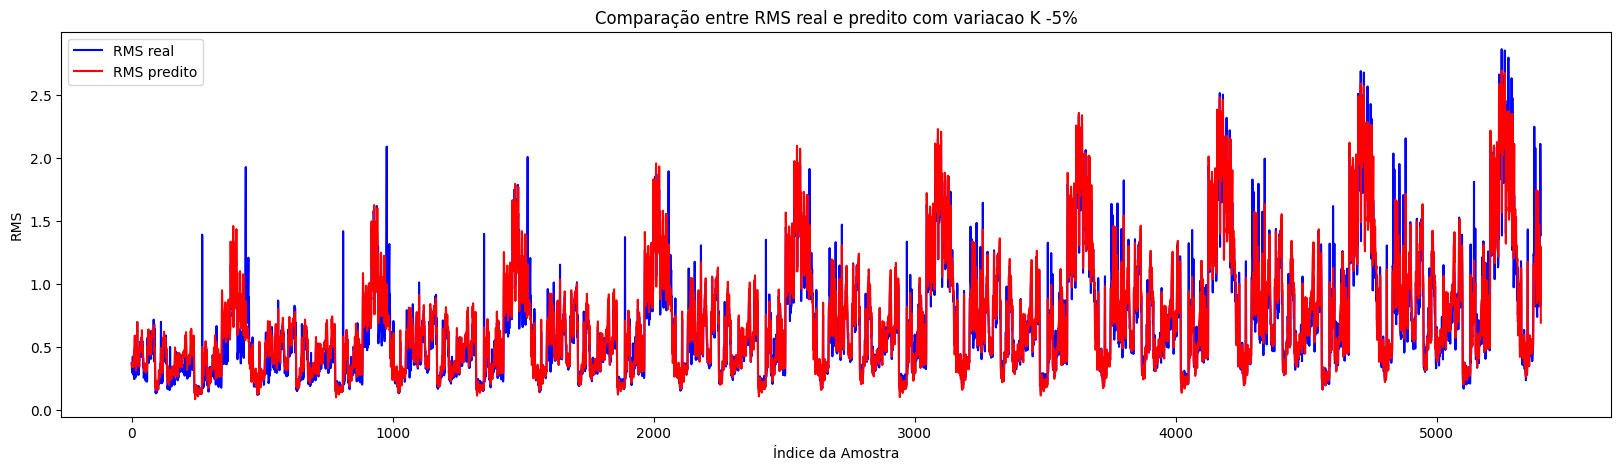

In [64]:
plt.figure(figsize=(20, 5))

plt.plot(range(len(y_A_HB)), y_A_HB, label='RMS real', color='blue')
plt.plot(range(len(y_pred_A_HB_k_menos_15)), y_pred_A_HB_k_menos_15, label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -5%')
plt.show()

##### K -15% 30 km/h

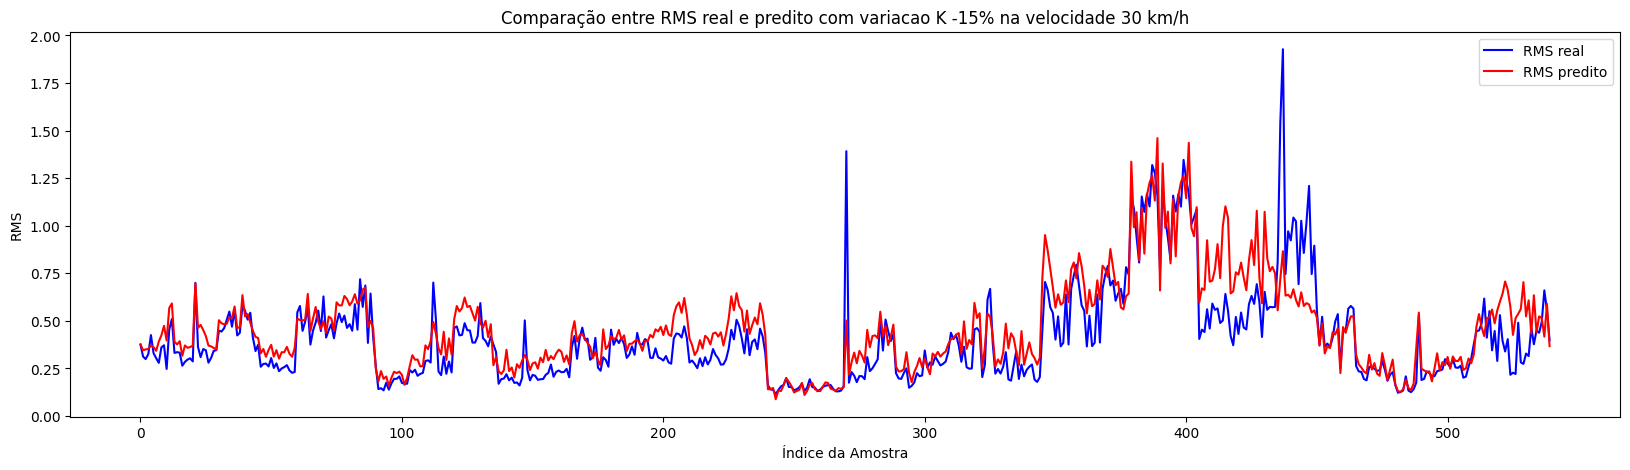

In [65]:
plt.figure(figsize=(20, 5))

plt.plot(range(540), y_A_HB[:540], label='RMS real', color='blue')
plt.plot(range(540), y_pred_A_HB_k_menos_15[:540], label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -15% na velocidade 30 km/h')
plt.show()

##### K -15% 40 km/h

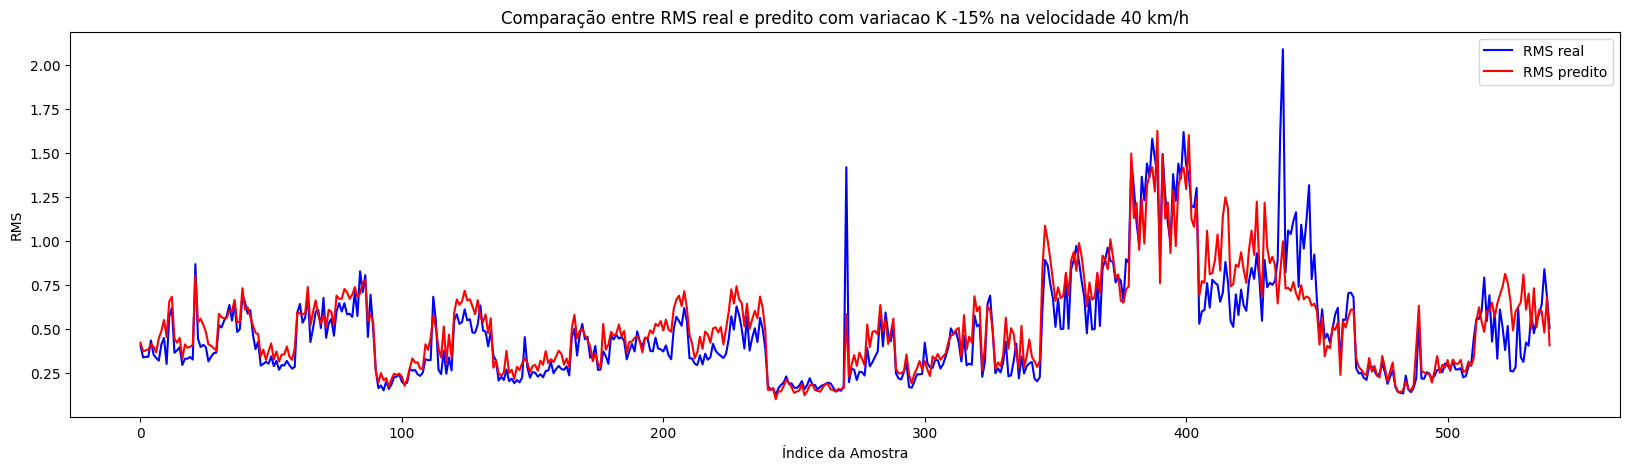

In [66]:
plt.figure(figsize=(20, 5))

plt.plot(range(540), y_A_HB[540:1080], label='RMS real', color='blue')
plt.plot(range(540), y_pred_A_HB_k_menos_15[540:1080], label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -15% na velocidade 40 km/h')
plt.show()

##### K -15% 50 km/h

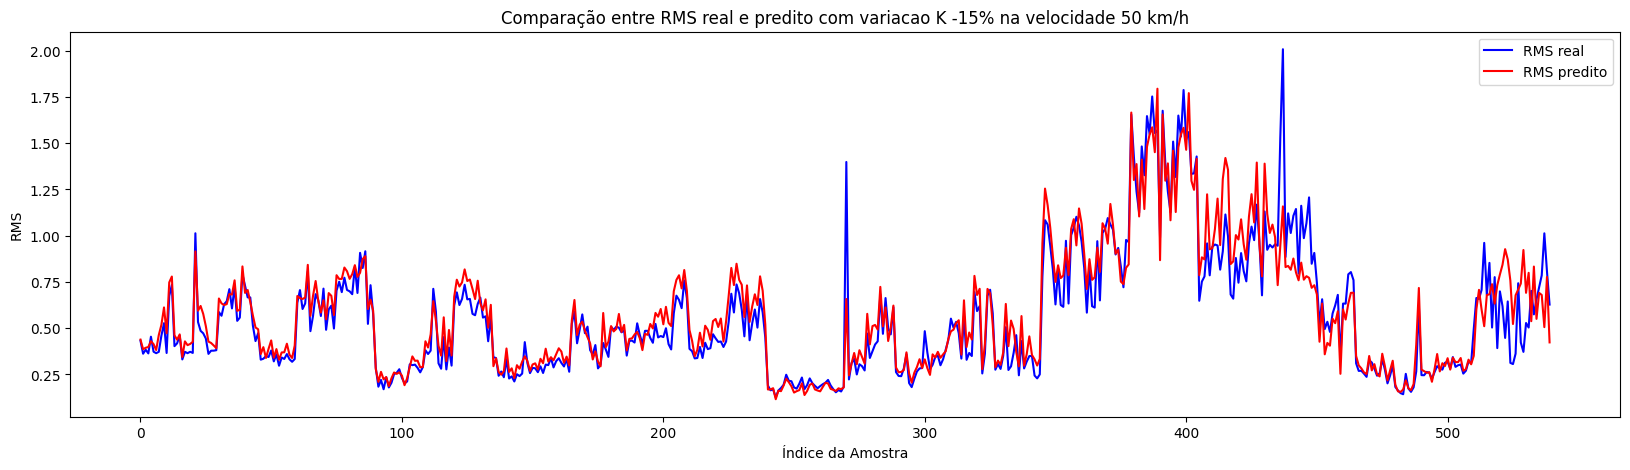

In [67]:
plt.figure(figsize=(20, 5))

plt.plot(range(540), y_A_HB[1080:1620], label='RMS real', color='blue')
plt.plot(range(540), y_pred_A_HB_k_menos_15[1080:1620], label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -15% na velocidade 50 km/h')
plt.show()

##### K -15% 60 km/h

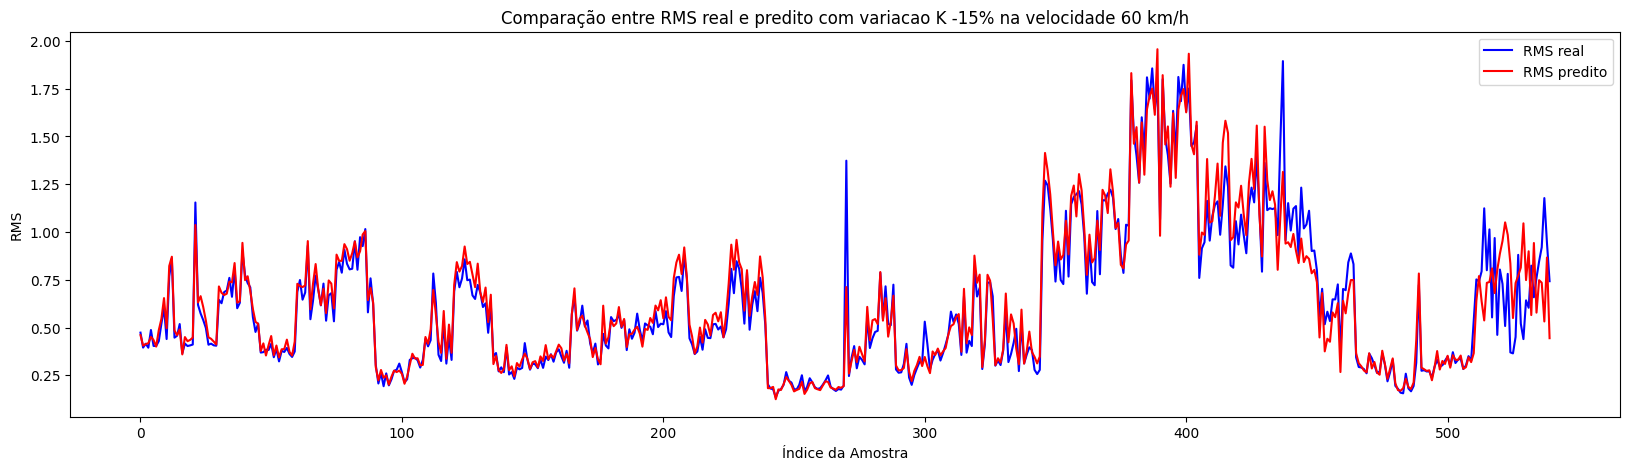

In [68]:
plt.figure(figsize=(20, 5))

plt.plot(range(540), y_A_HB[1620:2160], label='RMS real', color='blue')
plt.plot(range(540), y_pred_A_HB_k_menos_15[1620:2160], label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -15% na velocidade 60 km/h')
plt.show()

##### K -15% 70 km/h

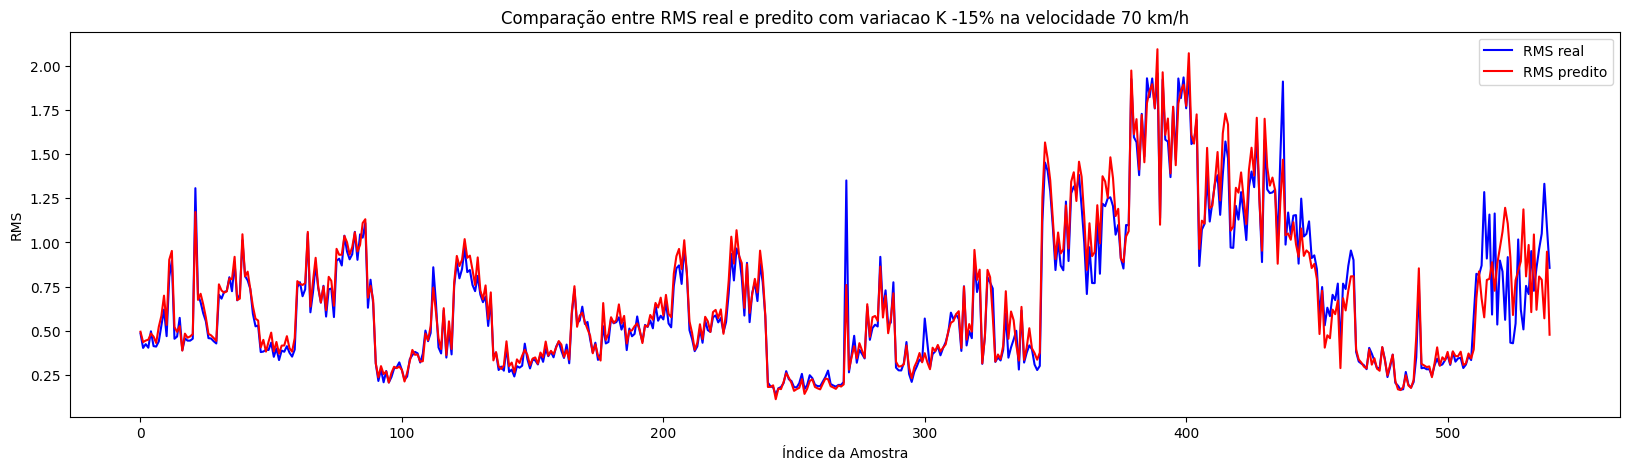

In [69]:
plt.figure(figsize=(20, 5))

plt.plot(range(540), y_A_HB[2160:2700], label='RMS real', color='blue')
plt.plot(range(540), y_pred_A_HB_k_menos_15[2160:2700], label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -15% na velocidade 70 km/h')
plt.show()

##### K -15% 80 km/h

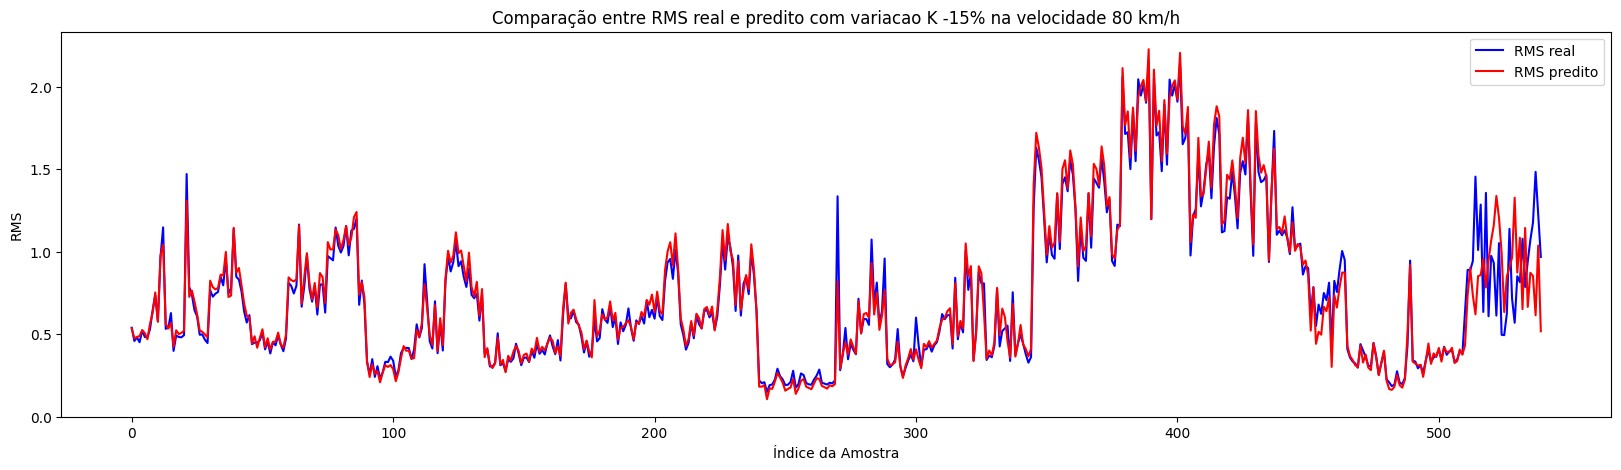

In [70]:
plt.figure(figsize=(20, 5))

plt.plot(range(540), y_A_HB[2700:3240], label='RMS real', color='blue')
plt.plot(range(540), y_pred_A_HB_k_menos_15[2700:3240], label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -15% na velocidade 80 km/h')
plt.show()

##### K -15% 90 km/h

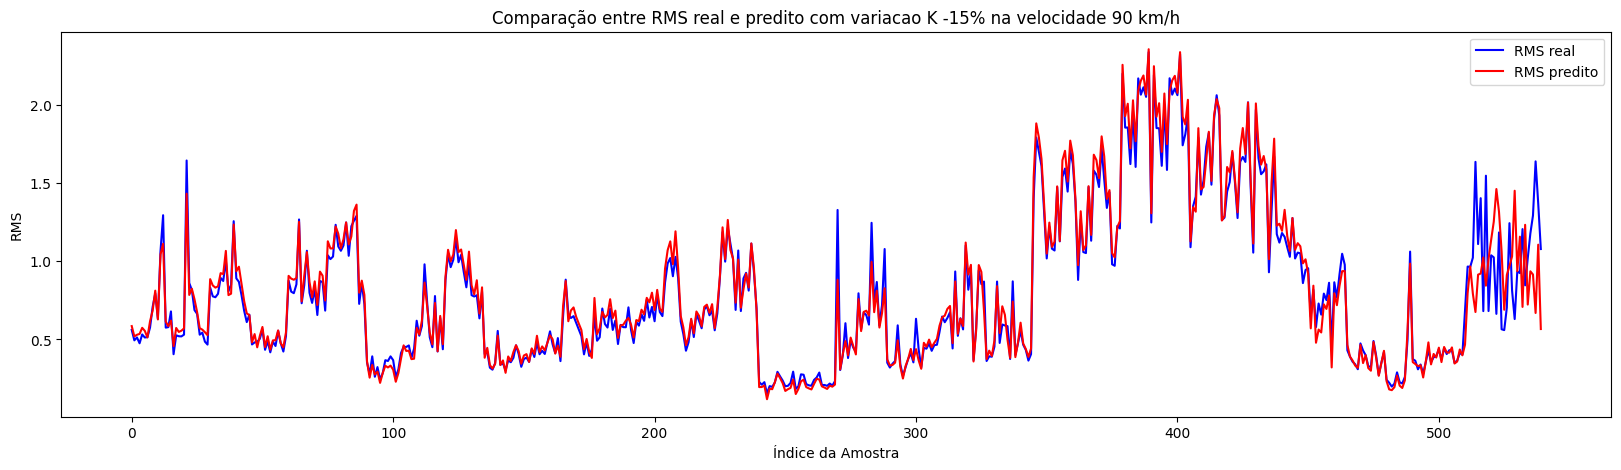

In [71]:
plt.figure(figsize=(20, 5))

plt.plot(range(540), y_A_HB[3240:3780], label='RMS real', color='blue')
plt.plot(range(540), y_pred_A_HB_k_menos_15[3240:3780], label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -15% na velocidade 90 km/h')
plt.show()

##### K -15% 100 km/h

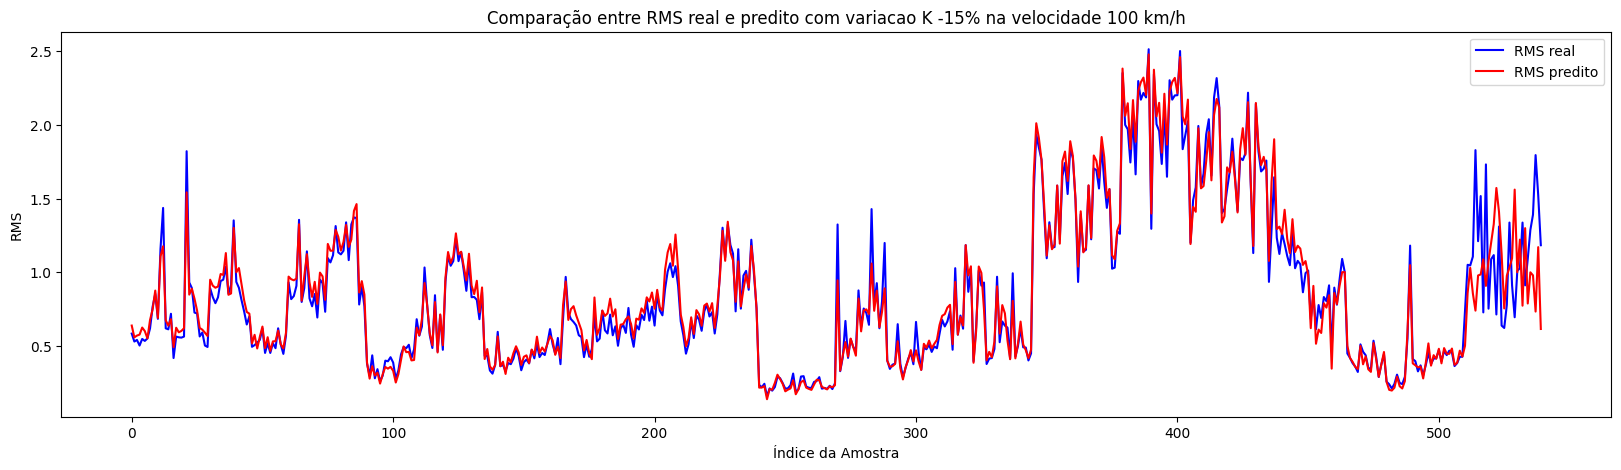

In [72]:
plt.figure(figsize=(20, 5))

plt.plot(range(540), y_A_HB[3780:4320], label='RMS real', color='blue')
plt.plot(range(540), y_pred_A_HB_k_menos_15[3780:4320], label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -15% na velocidade 100 km/h')
plt.show()

##### K -15% 110 km/h

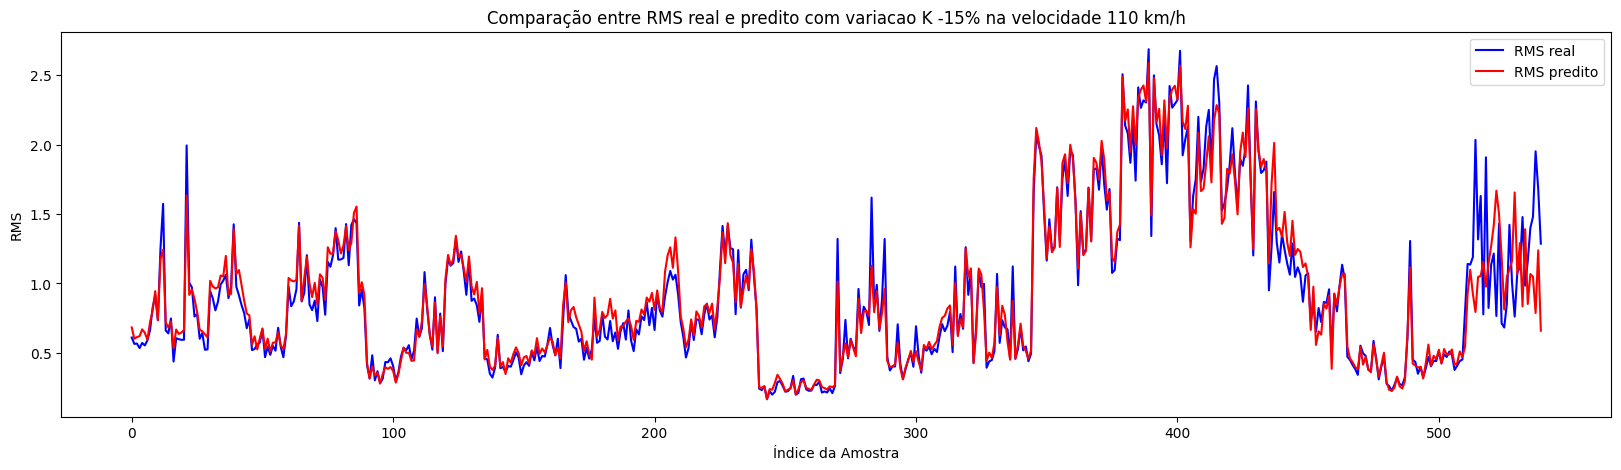

In [75]:
plt.figure(figsize=(20, 5))

plt.plot(range(540), y_A_HB[4320:4860], label='RMS real', color='blue')
plt.plot(range(540), y_pred_A_HB_k_menos_15[4320:4860], label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -15% na velocidade 110 km/h')
plt.show()

##### K -15% 120 km/h

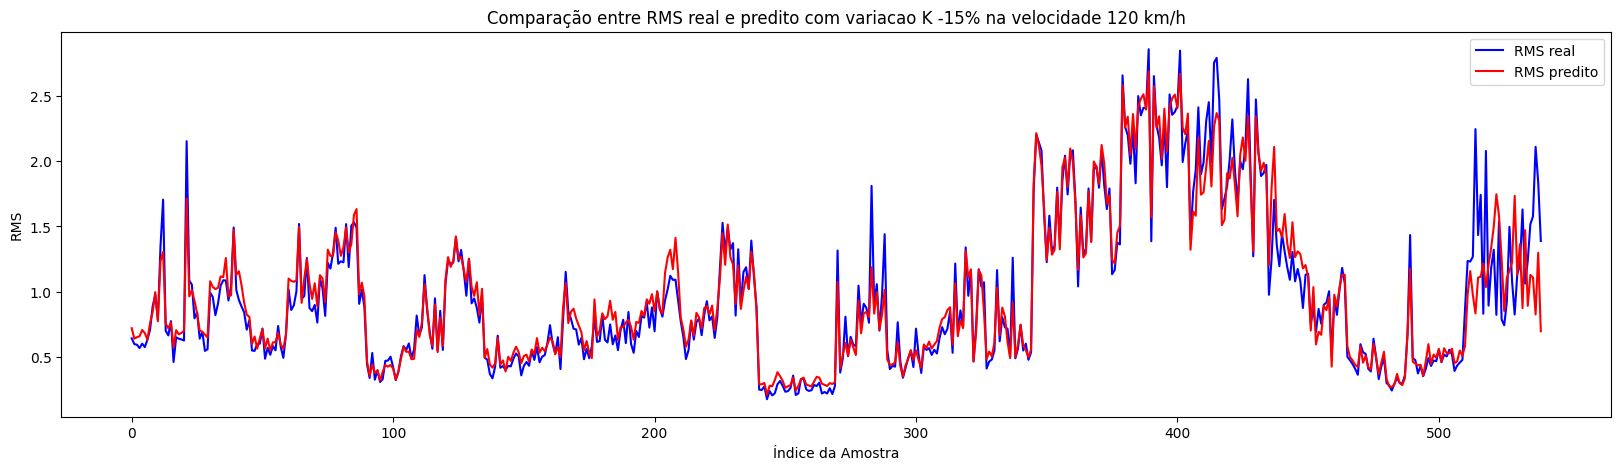

In [74]:
plt.figure(figsize=(20, 5))

plt.plot(range(540), y_A_HB[4860:5400], label='RMS real', color='blue')
plt.plot(range(540), y_pred_A_HB_k_menos_15[4860:5400], label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -15% na velocidade 120 km/h')
plt.show()

#### K +5%

In [73]:
X1_A_HB_k_mais_5 = df_A_HB.iloc[:, 1:3]
X2_A_HB_k_mais_5= df_A_HB.iloc[:, 3:8]

In [76]:
X2_A_HB_k_mais_5['k'] = 0.913
X2_A_HB_k_mais_5['c'] = 0.869
X2_A_HB_k_mais_5['ms'] = 0.869
X2_A_HB_k_mais_5['mus'] = 0.869
X2_A_HB_k_mais_5['kus'] = 0.869

In [77]:
print(X2_A_HB_k_mais_5)

          k      c     ms    mus    kus
0     0.913  0.869  0.869  0.869  0.869
1     0.913  0.869  0.869  0.869  0.869
2     0.913  0.869  0.869  0.869  0.869
3     0.913  0.869  0.869  0.869  0.869
4     0.913  0.869  0.869  0.869  0.869
...     ...    ...    ...    ...    ...
5395  0.913  0.869  0.869  0.869  0.869
5396  0.913  0.869  0.869  0.869  0.869
5397  0.913  0.869  0.869  0.869  0.869
5398  0.913  0.869  0.869  0.869  0.869
5399  0.913  0.869  0.869  0.869  0.869

[5400 rows x 5 columns]


In [78]:
scaler = MinMaxScaler()
X1_A_HB_k_mais_5 = scaler.fit_transform(X1_A_HB_k_mais_5)

In [79]:
X2_A_HB_k_mais_5 = X2_A_HB_k_mais_5.astype('float64').to_numpy()

In [80]:
X_A_HB_k_mais_5 = np.concatenate((X1_A_HB_k_mais_5, X2_A_HB_k_mais_5), axis=1)

In [81]:
print(X_A_HB_k_menos_15)

[[0.17507015 0.         0.739      ... 0.869      0.869      0.869     ]
 [0.14772091 0.         0.739      ... 0.869      0.869      0.869     ]
 [0.1517981  0.         0.739      ... 0.869      0.869      0.869     ]
 ...
 [0.21042462 1.         0.739      ... 0.869      0.869      0.869     ]
 [0.4029404  1.         0.739      ... 0.869      0.869      0.869     ]
 [0.16712854 1.         0.739      ... 0.869      0.869      0.869     ]]


In [82]:
y_pred_A_HB_k_mais_5 = modelo_A_HB.predict(X_A_HB_k_menos_15)

mse_A_HB_k_mais_5 = mean_squared_error(y_A_HB, y_pred_A_HB_k_mais_5)
r2_A_HB_k_mais_5 = r2_score(y_A_HB, y_pred_A_HB_k_mais_5)

print(f'Mean Squared Error (MSE): {mse_A_HB_k_mais_5:.3f}')
print(f'R^2 Score: {r2_A_HB_k_mais_5:.3f}')

169/169 [==============================] - 1s 5ms/step
Mean Squared Error (MSE): 0.018
R^2 Score: 0.918


##### K +5% 30 km/h

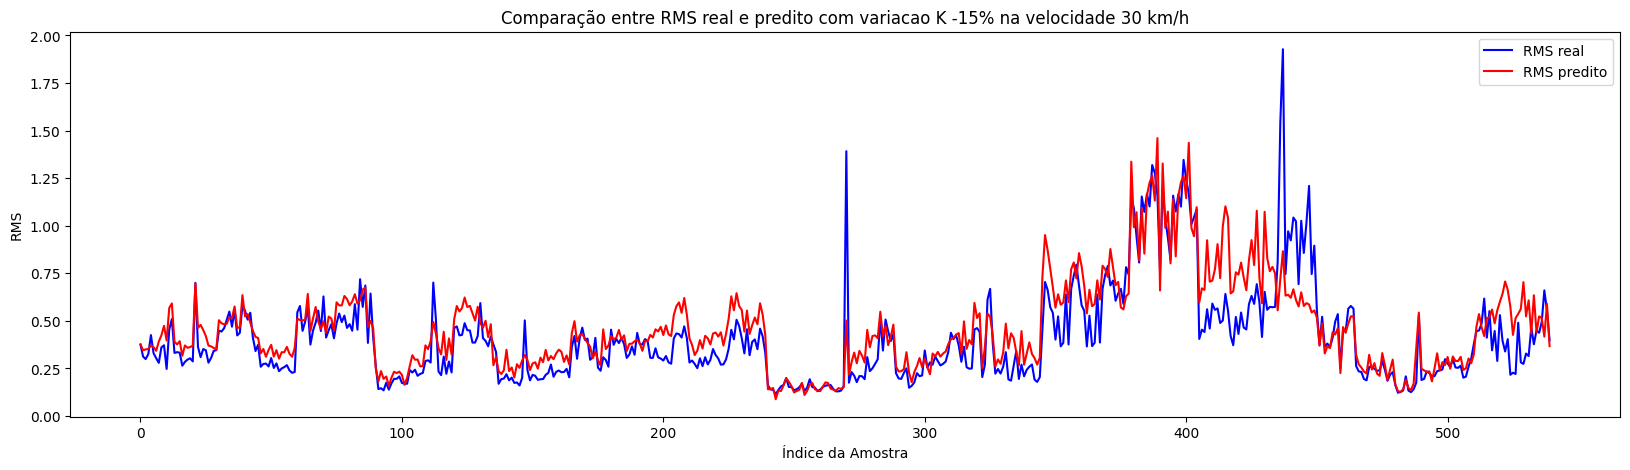

In [83]:
plt.figure(figsize=(20, 5))

plt.plot(range(540), y_A_HB[:540], label='RMS real', color='blue')
plt.plot(range(540), y_pred_A_HB_k_mais_5[:540], label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -15% na velocidade 30 km/h')
plt.show()

##### K +5% 40 km/h

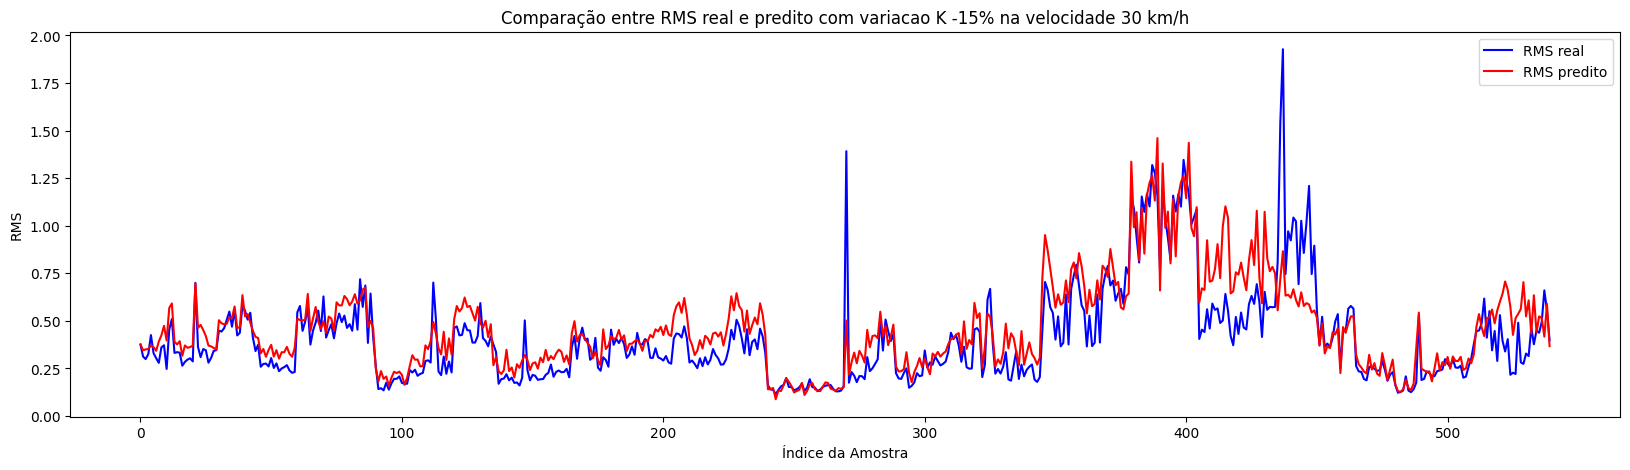

In [84]:
plt.figure(figsize=(20, 5))

plt.plot(range(540), y_A_HB[540:1080], label='RMS real', color='blue')
plt.plot(range(540), y_pred_A_HB_k_mais_5[540:1080], label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -15% na velocidade 40 km/h')
plt.show()

##### K +5% 50 km/h

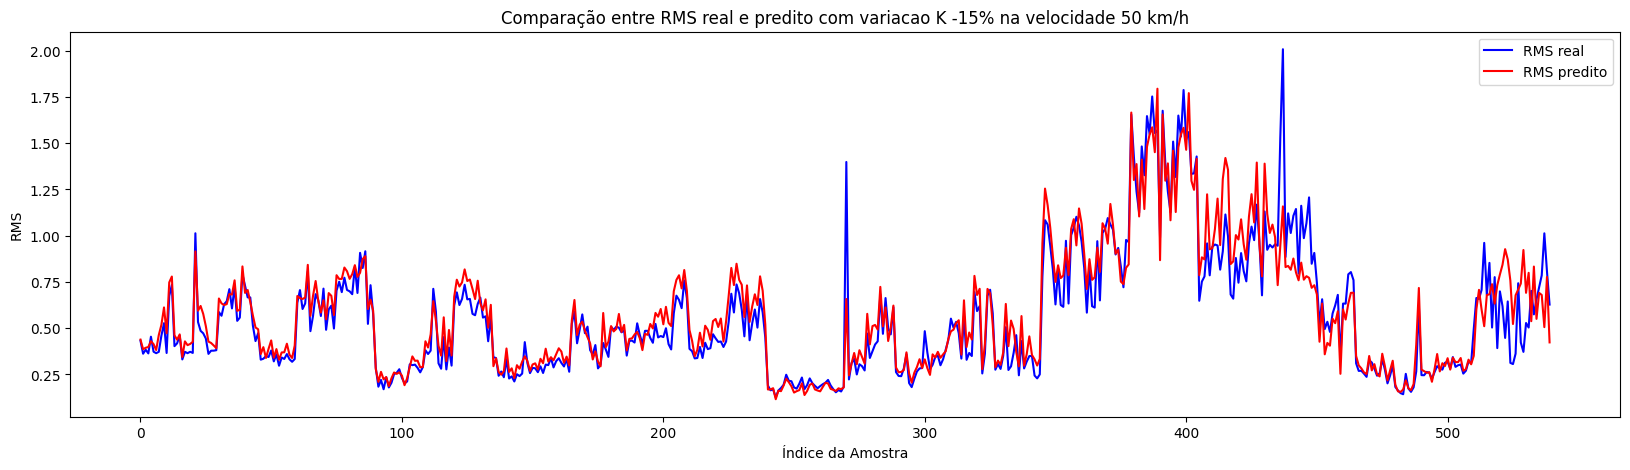

In [85]:
plt.figure(figsize=(20, 5))

plt.plot(range(540), y_A_HB[1080:1620], label='RMS real', color='blue')
plt.plot(range(540), y_pred_A_HB_k_mais_5[1080:1620], label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -15% na velocidade 50 km/h')
plt.show()

##### K +5% 60 km/h

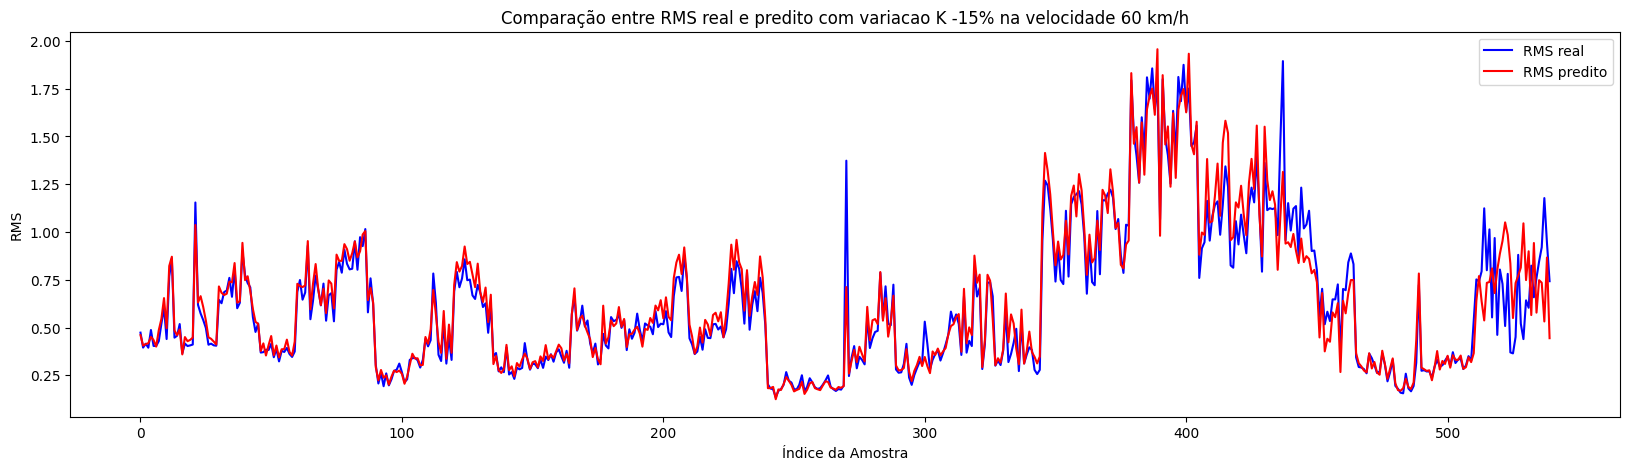

In [86]:
plt.figure(figsize=(20, 5))

plt.plot(range(540), y_A_HB[1620:2160], label='RMS real', color='blue')
plt.plot(range(540), y_pred_A_HB_k_mais_5[1620:2160], label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -15% na velocidade 60 km/h')
plt.show()

##### K +5% 70 km/h

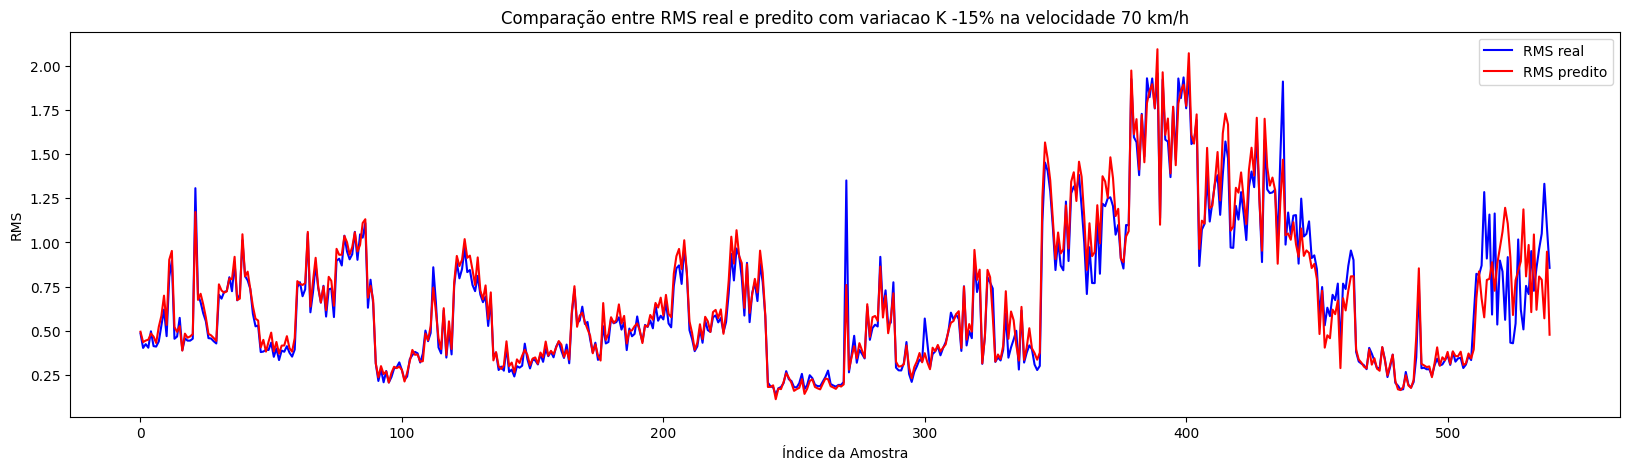

In [87]:
plt.figure(figsize=(20, 5))

plt.plot(range(540), y_A_HB[2160:2700], label='RMS real', color='blue')
plt.plot(range(540), y_pred_A_HB_k_mais_5[2160:2700], label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -15% na velocidade 70 km/h')
plt.show()

##### K +5% 80 km/h

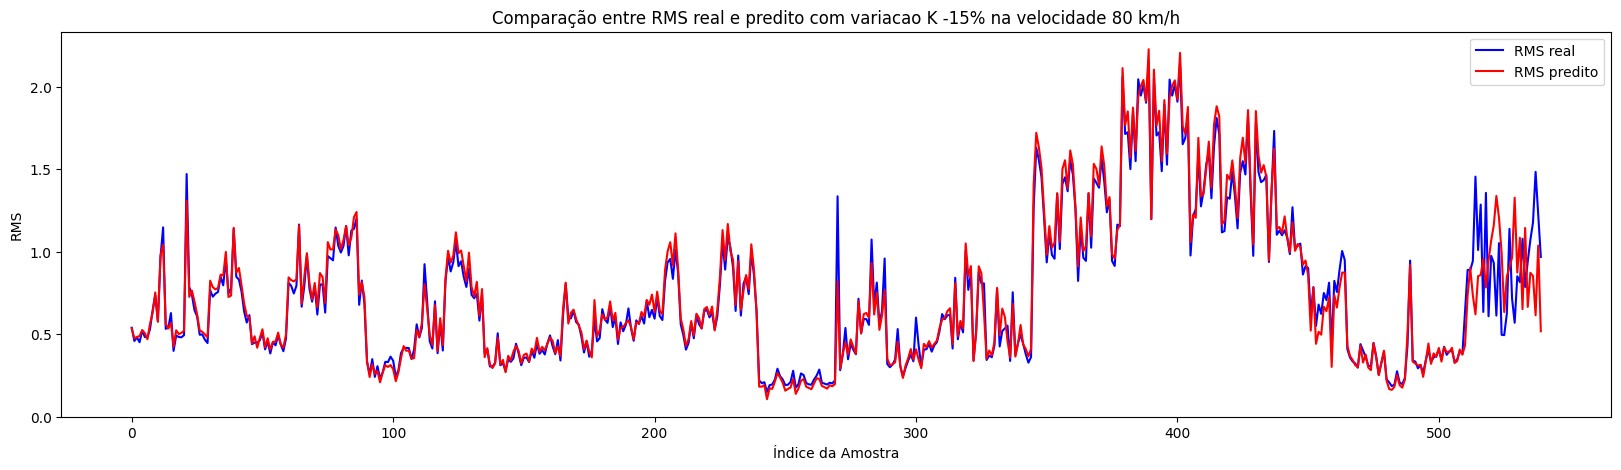

In [88]:
plt.figure(figsize=(20, 5))

plt.plot(range(540), y_A_HB[2700:3240], label='RMS real', color='blue')
plt.plot(range(540), y_pred_A_HB_k_mais_5[2700:3240], label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -15% na velocidade 80 km/h')
plt.show()

##### K +5% 90 km/h

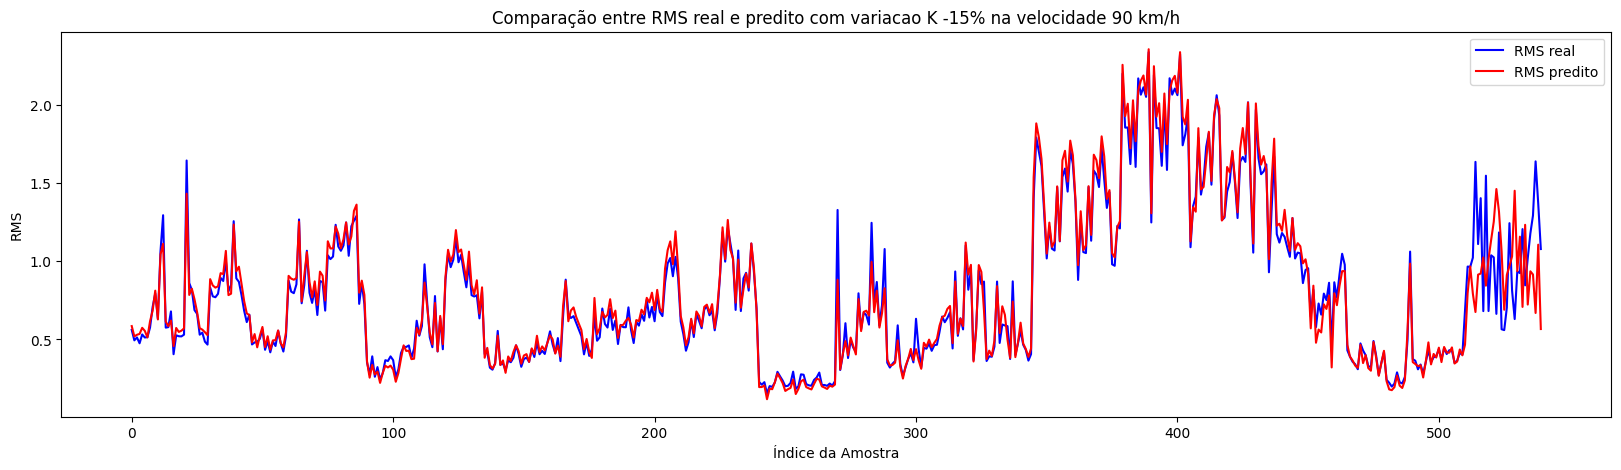

In [89]:
plt.figure(figsize=(20, 5))

plt.plot(range(540), y_A_HB[3240:3780], label='RMS real', color='blue')
plt.plot(range(540), y_pred_A_HB_k_mais_5[3240:3780], label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -15% na velocidade 90 km/h')
plt.show()

##### K +5% 100 km/h

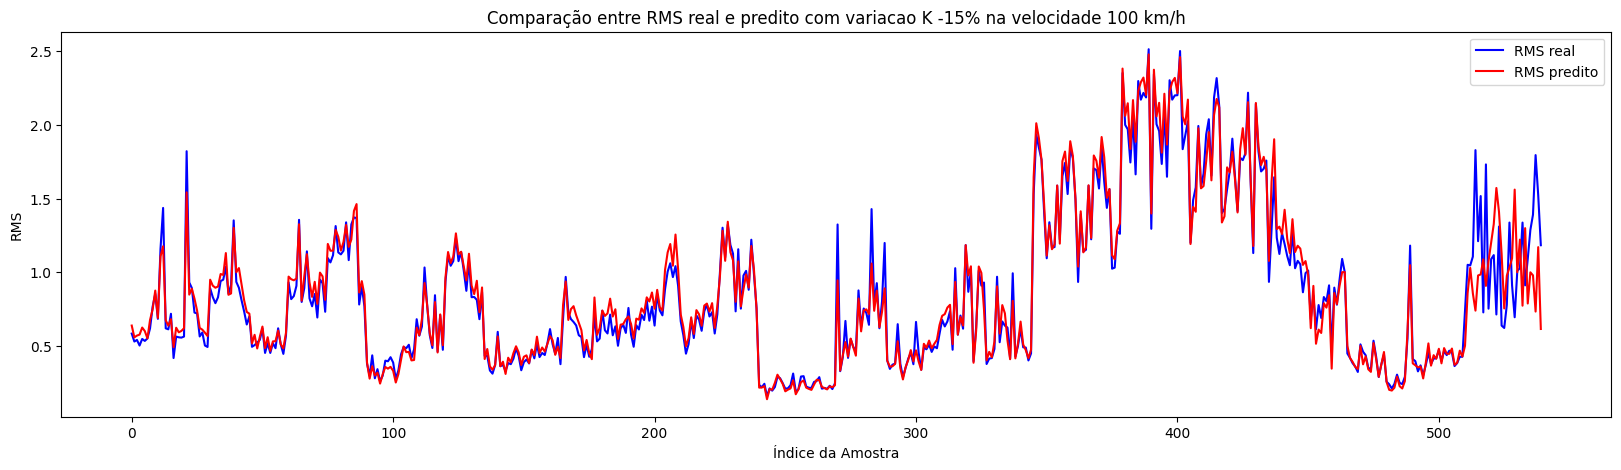

In [90]:
plt.figure(figsize=(20, 5))

plt.plot(range(540), y_A_HB[3780:4320], label='RMS real', color='blue')
plt.plot(range(540), y_pred_A_HB_k_mais_5[3780:4320], label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -15% na velocidade 100 km/h')
plt.show()

##### K +5% 110 km/h

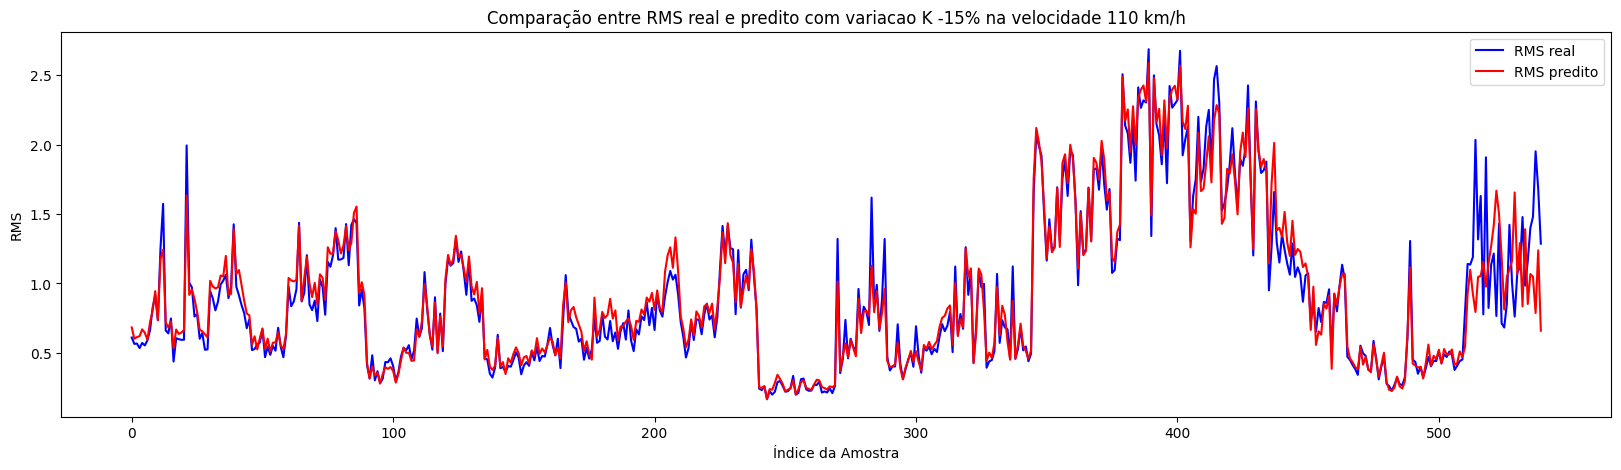

In [91]:
plt.figure(figsize=(20, 5))

plt.plot(range(540), y_A_HB[4320:4860], label='RMS real', color='blue')
plt.plot(range(540), y_pred_A_HB_k_mais_5[4320:4860], label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -15% na velocidade 110 km/h')
plt.show()

##### K +5% 120 km/h

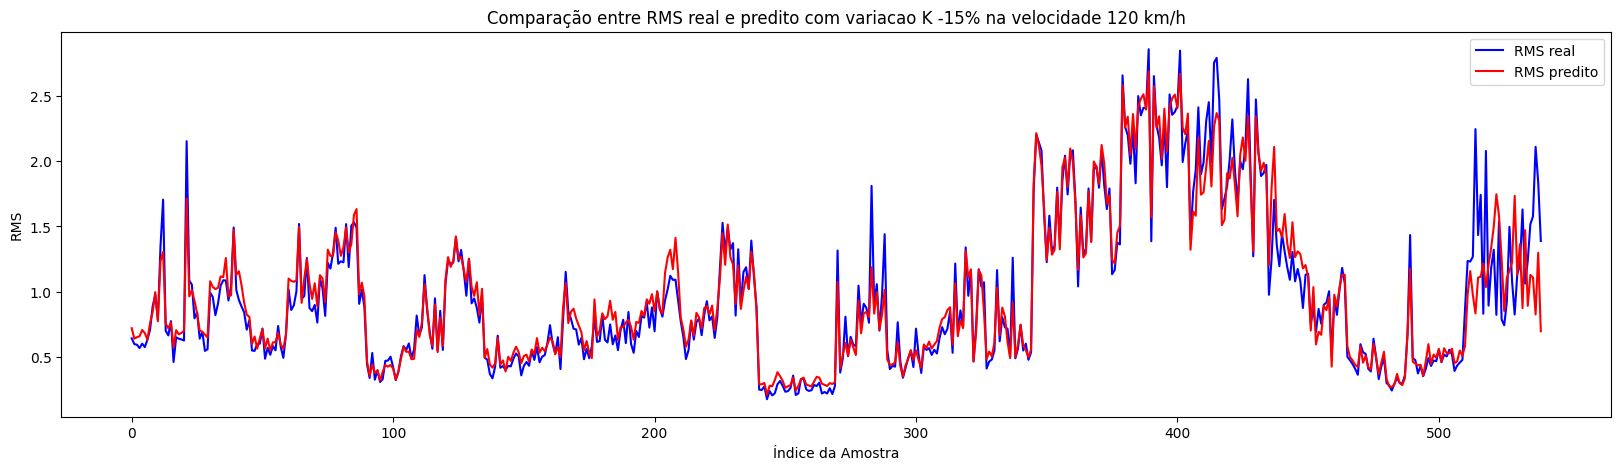

In [92]:
plt.figure(figsize=(20, 5))

plt.plot(range(540), y_A_HB[4860:5400], label='RMS real', color='blue')
plt.plot(range(540), y_pred_A_HB_k_mais_5[4860:5400], label='RMS predito', color='red')
plt.legend()
plt.xlabel('Índice da Amostra')
plt.ylabel('RMS')
plt.title('Comparação entre RMS real e predito com variacao K -15% na velocidade 120 km/h')
plt.show()

#### K +10%